<a href="https://colab.research.google.com/github/hueyqing/LIN373_Project_SentimentAnalysis/blob/master/SentimentAnalysis_MovieReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Sentiment Analysis of Text for Moview Review Prediction
Project by: Group 8, Tan Huey Qing [ ht7627 ] & Sarang Rastogi [ sr45936 ]<br><br>
__GOAL:__<br>
To be able to predict the sentiment of movie reviews as accurately as possible<br><br>
__WHAT IS SENTIMENT ANALYSIS?__<br>
Sentiment Analysis can be defined as the process of computationally determining whether a piece of writing is positive, negative, neutral etc. In context of speech it can be coined as ‘opinion mining’ to derive the opinion or attitude of a speaker. <br><br>
__DATA/ RESOURCES:__<br>
We have chosen the IMDB dataset of 50k movie reviews from here:<br>
https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews#IMDB%20Dataset.csv<br><br>
__MACHINE LEARNING ALGORITHMS/ MODELS:__<br>
To study the correlation between the sentiment analysis results and movie review sentiment prediction, we aim to implement algorithms of Naive Bayes, logistic Regression and SVMs depending on the trend the factor we choose displays and find the best model.<br><br>
__ACCURACY/ EVALUATION:__
We aim to find the accuracy of our sentiment analysis using k-fold cross validation and analysing the accuracy of predictions using multiple classifiers such as neural networks and ensemble methods. 

# 1. Load Data & General Preprocessing

In [1]:
%%time
## LOAD DATA & CONVERT POS/NEG TO 1/0
import pandas as pd

# from sklearn.datasets import load_files
# load data using sklearn.datasets.load_files
# dataset = load_files("IMDB_Dataset.csv")

df = pd.read_csv('IMDB_Dataset.csv')
df["review"] = df["review"].str.lower()
# print(df.head())

for row in range (len(df)):
    if (df['sentiment'].iloc[row] == 'positive'):
        df['sentiment'].iloc[row] = 1
    else:
        df['sentiment'].iloc[row] = 0 
# print (df.head())

Wall time: 1min 6s


# 2. Preprocess Data with Train Test Split & Count Vectorizer
This is to be used for Naive Bayes and Logistic Regression

In [48]:
%%time
## PROCESS DATA FOR NB & LR WITH TRAIN TEST SPLIT & VECTORIZER

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

text_data = df.drop(['sentiment'], axis = 1)
# print (text_data)
labels = df.drop(['review'], axis = 1)
# print (labels)
docs_train, docs_test, y_train, y_test = train_test_split(text_data, labels, test_size = 0.2, random_state = 1000)
# print (docs_train)

# vectorize the training data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(docs_train.review)
# print(len(vectorizer.get_feature_names()))
# print(vectorizer.get_feature_names()[:1000])
# print(X_train[0])

Wall time: 9.11 s


 ### 2.1 Generate Naive Bayes  Model

In [49]:
%%time
## NAIVE BAYES MODEL WITH SINGLE TRAIN/TEST/SPLIT
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm

# REMEMBER to test out different parameters
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
# vectorize the test data and predict 
X_test = vectorizer.transform(docs_test.review)
# print(np.shape(X_test))
y_hat_nb = nb_model.predict(X_test)
# print ('y_hat_nb')
# print (y_hat_nb)
probs = []
probs = nb_model.predict_proba(X_test)
# print ('probs')
# print (probs)
# get accuracy score
accuracy_score_nb = metrics.accuracy_score(y_test, y_hat_nb)

# print out some data
print("nb_model accuracy is : ", accuracy_score_nb)
print("classification report:\n", metrics.classification_report(y_test, y_hat_nb))

# print(np.shape(X_test))

X_train= (40000, 93033)
y_train= (40000, 1)
nb_model accuracy is :  0.8415
classification report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      5054
           1       0.86      0.81      0.83      4946

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Wall time: 2.54 s


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
'''mat = confusion_matrix(X_train, y_train)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=X_train_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');'''
probs1 = []
fpr, tpr = [], []
for i in range (0, len(probs)):
    probs1.append(probs[i][1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs1)
score = metrics.roc_auc_score(y_test, probs1)
print ("Area: ", score)

# Plotting ROC 
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
print("TPR(Sensitivity): " + str(tpr))
print("TNR(Specificity): " + str(1-fpr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rates')
plt.title('ROC Curve Naive Bayes')
plt.savefig('ROC_nb.png')
plt.show()

Area:  0.9140351330579198
TPR(Sensitivity): [0.         0.19187222 0.19227659 ... 0.99979782 1.         1.        ]
TNR(Specificity): [1.         0.9908983  0.9908983  ... 0.00356154 0.00356154 0.        ]


<Figure size 640x480 with 1 Axes>

In [5]:
## NAIVE BAYES MODEL WITH K-FOLD CROSS VALIDATION

from sklearn.model_selection import cross_val_score

nb_xval_model = MultinomialNB()
X = vectorizer.fit_transform(df.review)
y = df.sentiment
nb_xval_scores = cross_val_score(nb_xval_model, X,y, cv=10)

print("Accuracy for Naive Bayes with Cross Validation: %0.4f (+/- %0.4f)" % (nb_xval_scores.mean(), nb_xval_scores.std() * 2))

Accuracy for Naive Bayes with Cross Validation: 0.8499 (+/- 0.0062)


 ### 2.2 Generate Logistic Regression Model

In [6]:
%%time
## GENERATE LOGISTIC REGRESSION MODEL WITH SKLEARN
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

text_data = df.drop(['sentiment'], axis = 1)
# print (text_data)
labels = df.drop(['review'], axis = 1)
# print (labels)
docs_train, docs_test, y_train, y_test = train_test_split(text_data, labels, test_size = 0.2, random_state = 1000)
# print (docs_train)

# vectorize the training data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(docs_train.review)
# REMEMBER to test out different parameters
lr_model = LogisticRegression(solver = 'saga')
lr_model.fit(X_train, y_train)

# vectorize the test data and predict 
X_test = vectorizer.transform(docs_test.review)
# I HAD TO COMMENT THE LINE ABOVE BECAUSE IT CAUSED AN ERROR I DO NOT KNOW WHY ITS LITERALLY THE SAME AS THE NB ONE.....
# 4TGLHURIGHWGWOGREIP UGHHHHHHHHHHHHHH

y_hat_lr = lr_model.predict(X_test)
probs_lr = []
probs_lr = lr_model.predict_proba(X_test)
# get accuracy score
accuracy_score_lr = metrics.accuracy_score(y_test, y_hat_lr)

# print out some data
print("lr_model accuracy is : ", metrics.accuracy_score(y_test, y_hat_lr))
print("classification report:\n", metrics.classification_report(y_test, y_hat_lr))



C:\Users\hueyq\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hueyq\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


lr_model accuracy is :  0.8818
classification report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      5054
           1       0.87      0.89      0.88      4946

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Wall time: 31.5 s


Area:  0.9467135846725161
TPR(Sensitivity): [0.00000000e+00 2.02183583e-04 4.79175091e-02 ... 9.99797816e-01
 1.00000000e+00 1.00000000e+00]
TNR(Specificity): [1.         1.         1.         ... 0.02374357 0.02374357 0.        ]


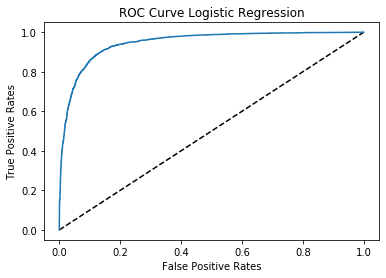

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
'''mat = confusion_matrix(X_train, y_train)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=X_train_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');'''
probs1_lr = []
fpr, tpr = [], []
for i in range (0, len(probs_lr)):
    probs1_lr.append(probs_lr[i][1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs1_lr)
score = metrics.roc_auc_score(y_test, probs1_lr)
print ("Area: ", score)

# Plotting ROC 
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
print("TPR(Sensitivity): " + str(tpr))
print("TNR(Specificity): " + str(1-fpr))
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.title('ROC Curve Logistic Regression')
plt.savefig('ROC_lr.png')
plt.show()

In [8]:
## LOGISTIC REGRESSION MODEL WITH K-FOLD CROSS VALIDATION

# Try different parameters
lr_xval_model = LogisticRegression(random_state = 3, solver = 'saga')
X = vectorizer.fit_transform(df.review)
y = df.sentiment
lr_xval_scores = cross_val_score(lr_xval_model, X,y, cv=10)

print("Accuracy for Logistic Regression: %0.4f (+/- %0.4f)" % (lr_xval_scores.mean(), lr_xval_scores.std() * 2))


C:\Users\hueyq\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for Logistic Regression: 0.8834 (+/- 0.0081)


In [9]:
# pip install smart-open==1.9.0
# do we still need this?

# 3. Learn Word Embeddings with Word2Vec
To make NN & SVM

In [10]:
%%time
## PREPROCESS DATA FOR WORD2VEC

import nltk
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import STOPWORDS

sentList = []
for review in df[:50000]["review"]:
    sentences = nltk.sent_tokenize(review)
    str1 = ''.join(sentences)
    sentences = preprocess_string(str1)
    sentList.append(sentences)

"""  
from nltk.stem.porter import *
from gensim.utils import simple_preprocess
words = []
for mylist in sentList:    
    for myword in mylist:
        words.append(myword)
print(words)
print("\n")
for review in df[:100]["review"]:
    sentences = nltk.sent_tokenize(review)   
print(sentences)
for review in df[:10]["review"]:
    sentences = nltk.sent_tokenize(review)
    for sentence in sentences:
        tokenized.append(nltk.word_tokenize(sentence))
for mylist in tokenized:    
    for myword in mylist:
        words.append(myword)
#print(words)
stemmer = PorterStemmer()
stems = [stemmer.stem(w) for w in words]
print(' '.join(stems))
"""

Wall time: 2min 3s


'  \nfrom nltk.stem.porter import *\nfrom gensim.utils import simple_preprocess\nwords = []\nfor mylist in sentList:    \n    for myword in mylist:\n        words.append(myword)\nprint(words)\nprint("\n")\nfor review in df[:100]["review"]:\n    sentences = nltk.sent_tokenize(review)   \nprint(sentences)\nfor review in df[:10]["review"]:\n    sentences = nltk.sent_tokenize(review)\n    for sentence in sentences:\n        tokenized.append(nltk.word_tokenize(sentence))\nfor mylist in tokenized:    \n    for myword in mylist:\n        words.append(myword)\n#print(words)\nstemmer = PorterStemmer()\nstems = [stemmer.stem(w) for w in words]\nprint(\' \'.join(stems))\n'

In [ ]:
%%time
## GENERATE WORD2VEC MODEL

from gensim.models import Word2Vec

w2v_model = Word2Vec(sentList, size=100,  min_count=1) 
# change min count later
# print(w2v_model)

# summarize vocabulary
words = list(w2v_model.wv.vocab)
print(words)

# save model for later in binary format to save space.
w2v_model.save('w2v_model_50k.bin')
# save non binary to be loaded into other models (?)
w2v_model.wv.save_word2vec_format('w2v_50k.txt', binary=False)

# to review embedded vector for a specific token:
# print(w2v_model.wv[<<INSERT TOKEN>>])


Word2Vec(vocab=72299, size=100, alpha=0.025)


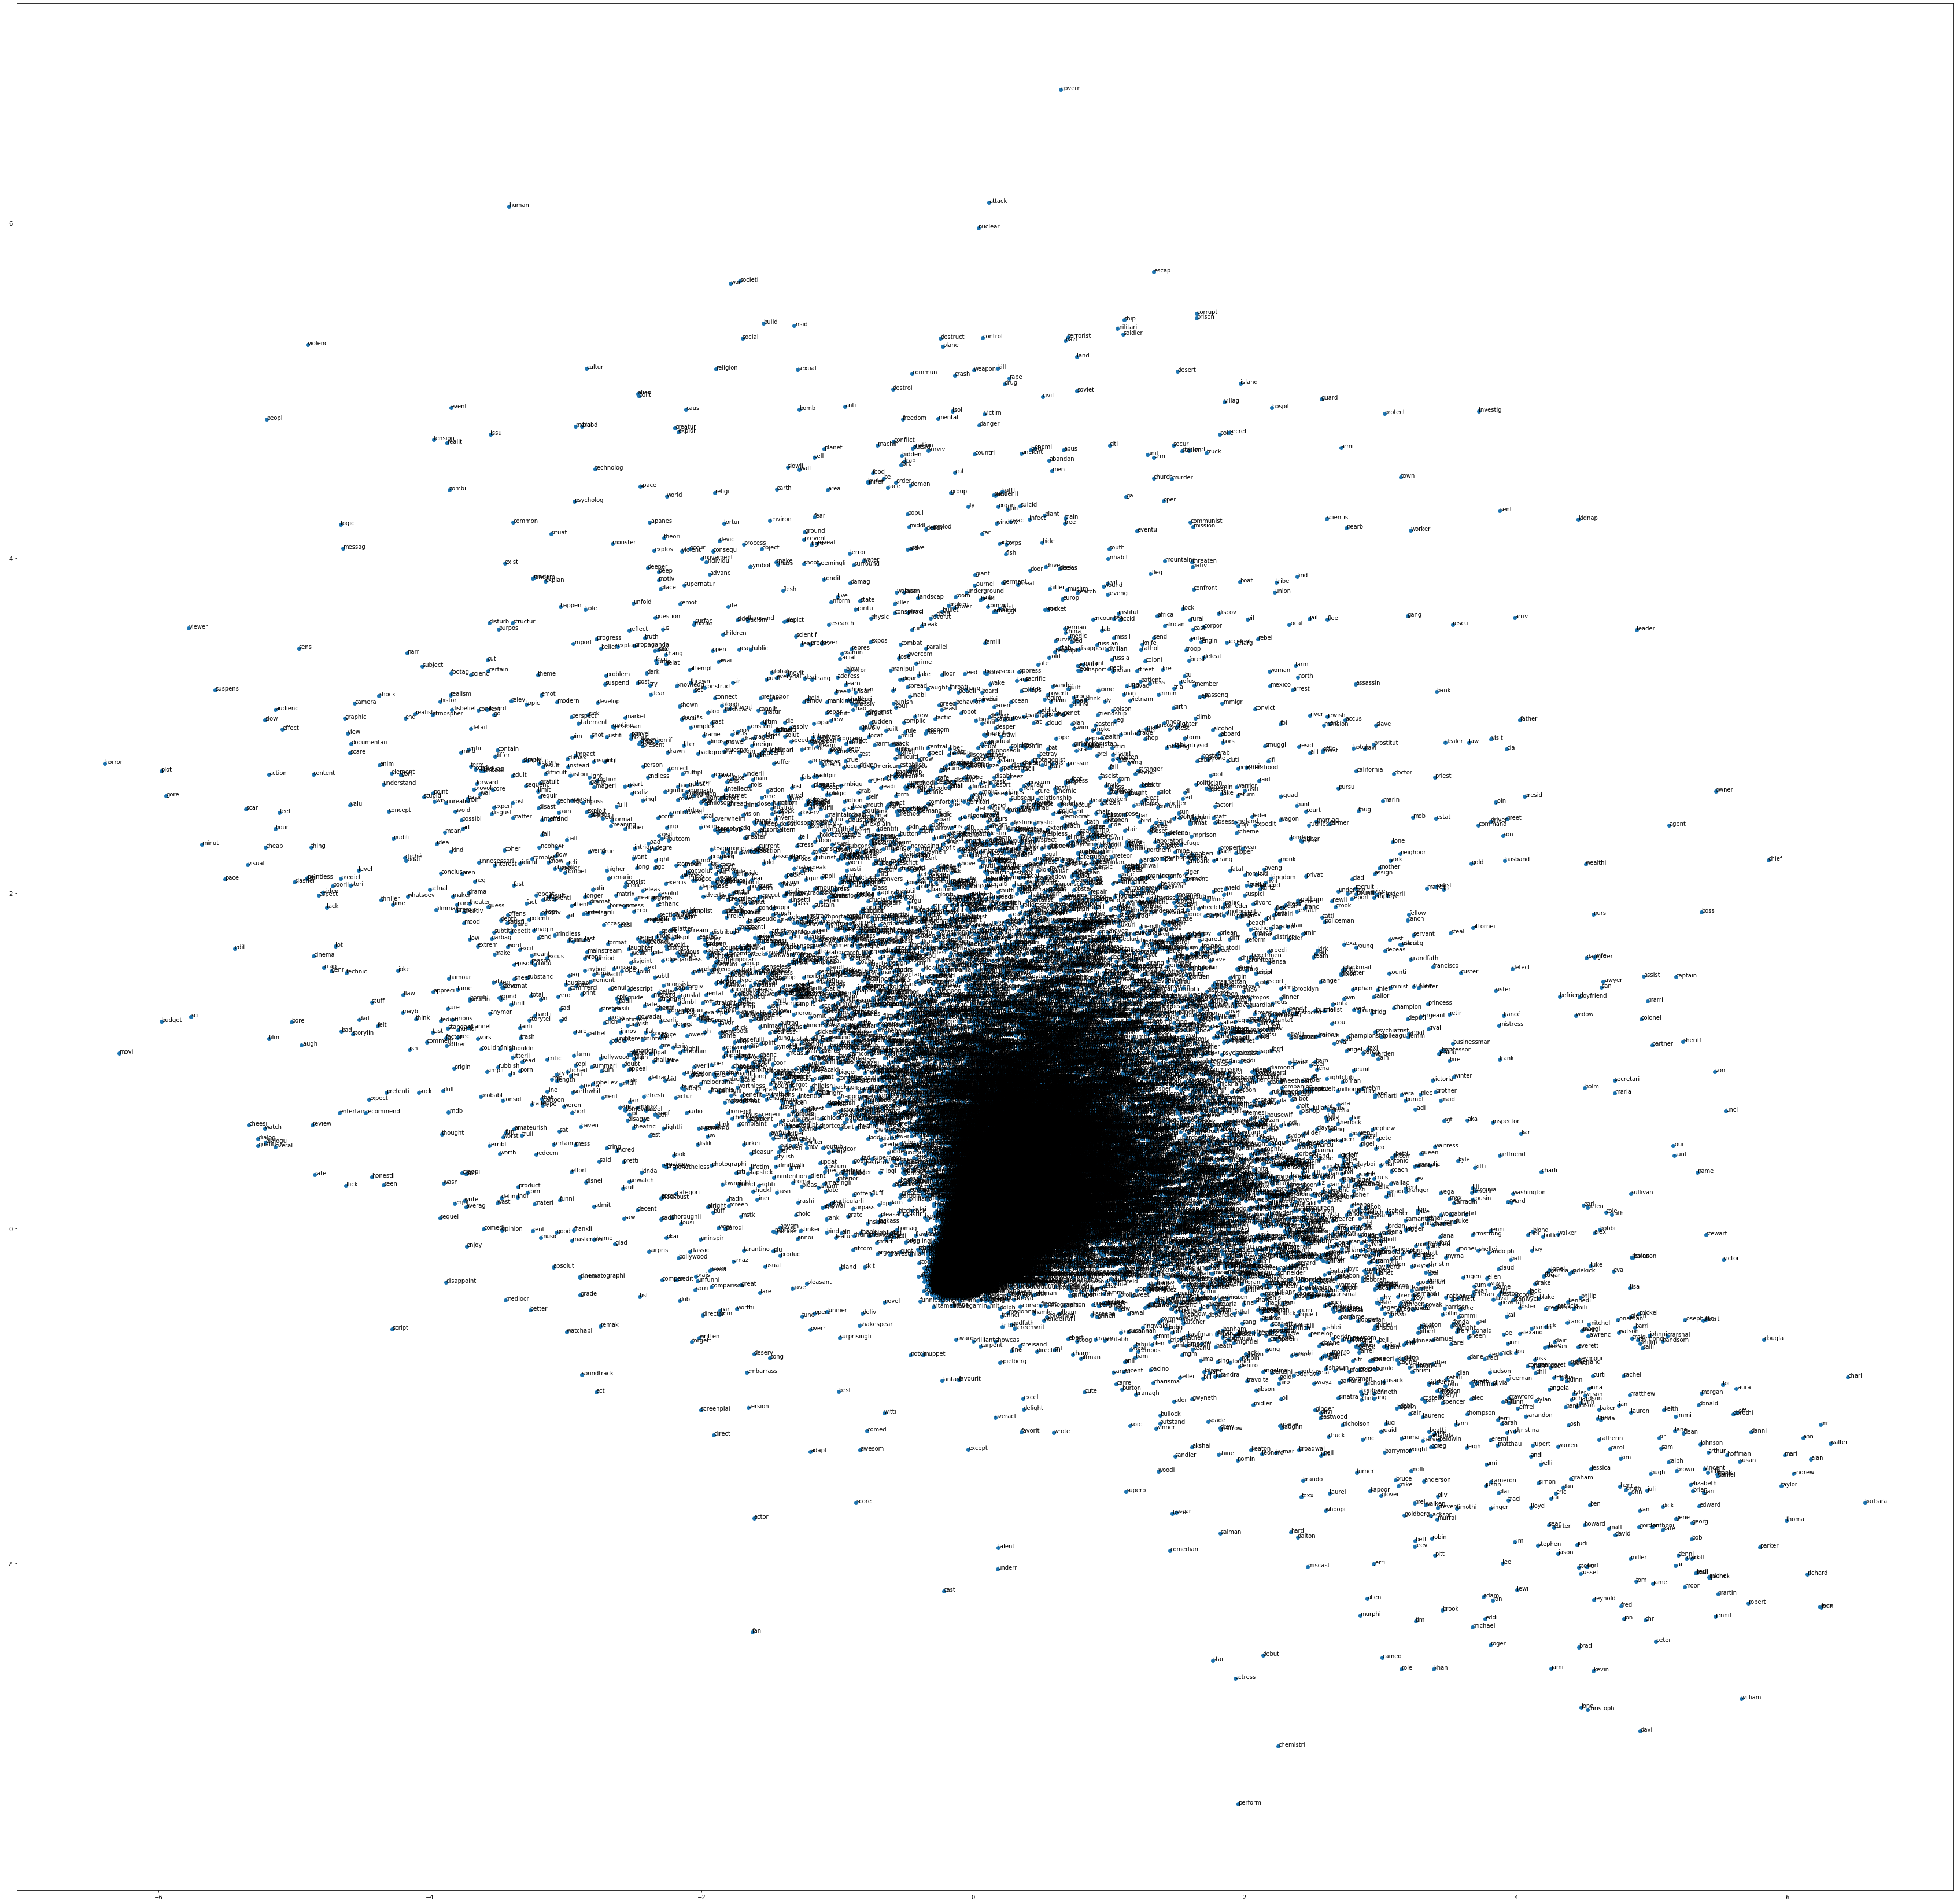

In [16]:
## PLOT WORD2VEC WORD EMBEDDINGS USING PCA

from sklearn.decomposition import PCA
from matplotlib import pyplot
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings("ignore")

# load model
w2v_model = Word2Vec.load('w2v_model_50k.bin')
print(w2v_model)
X = w2v_model[w2v_model.wv.vocab]

# fit a 2D PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
pyplot.rcParams["figure.figsize"] = (60,60)
pyplot.plot([-0.1,0.1], [-0.1,0.1])
words = list(w2v_model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.savefig('w2v_50k.png')
pyplot.show()

In [ ]:
## CHECK OUT FUN RESULTS FROM WORD2VEC MODEL

print(str(w2v_model.wv.most_similar(positive = "funni", topn = 5)) + "\n") 
print(str(w2v_model.wv.most_similar(positive = "director", topn = 3)) + "\n") 
print(str(w2v_model.wv.most_similar(positive = ['food', 'bad'], topn = 3)) + "\n")
print(str(w2v_model.wv.most_similar(positive = ['woman', 'king'], negative = ['man'], topn = 3)) + "\n")

### 3.1 Word2Vec: Effects of Downsampling

In [12]:
import nltk
from gensim.parsing.preprocessing import preprocess_string
from gensim.models import Word2Vec

## GENERATE WORD2VEC WITH MUCH LESS DATA

sentListSmall = []
for review in df.sample(n=100)["review"]:
    sentencesSmall = nltk.sent_tokenize(review)
    str1 = ''.join(sentencesSmall)
    sentencesSmall = preprocess_string(str1)
    sentListSmall.append(sentencesSmall)

w2v_model_small = Word2Vec(sentListSmall, size=100,  min_count=1) 
XSmall = w2v_model_small[w2v_model_small.wv.vocab]
w2v_model_small.save('w2v_model_100.bin')
w2v_model_small.wv.save_word2vec_format('w2v_model_100.txt', binary=False)


C:\Users\hueyq\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


Word2Vec(vocab=3765, size=100, alpha=0.025)


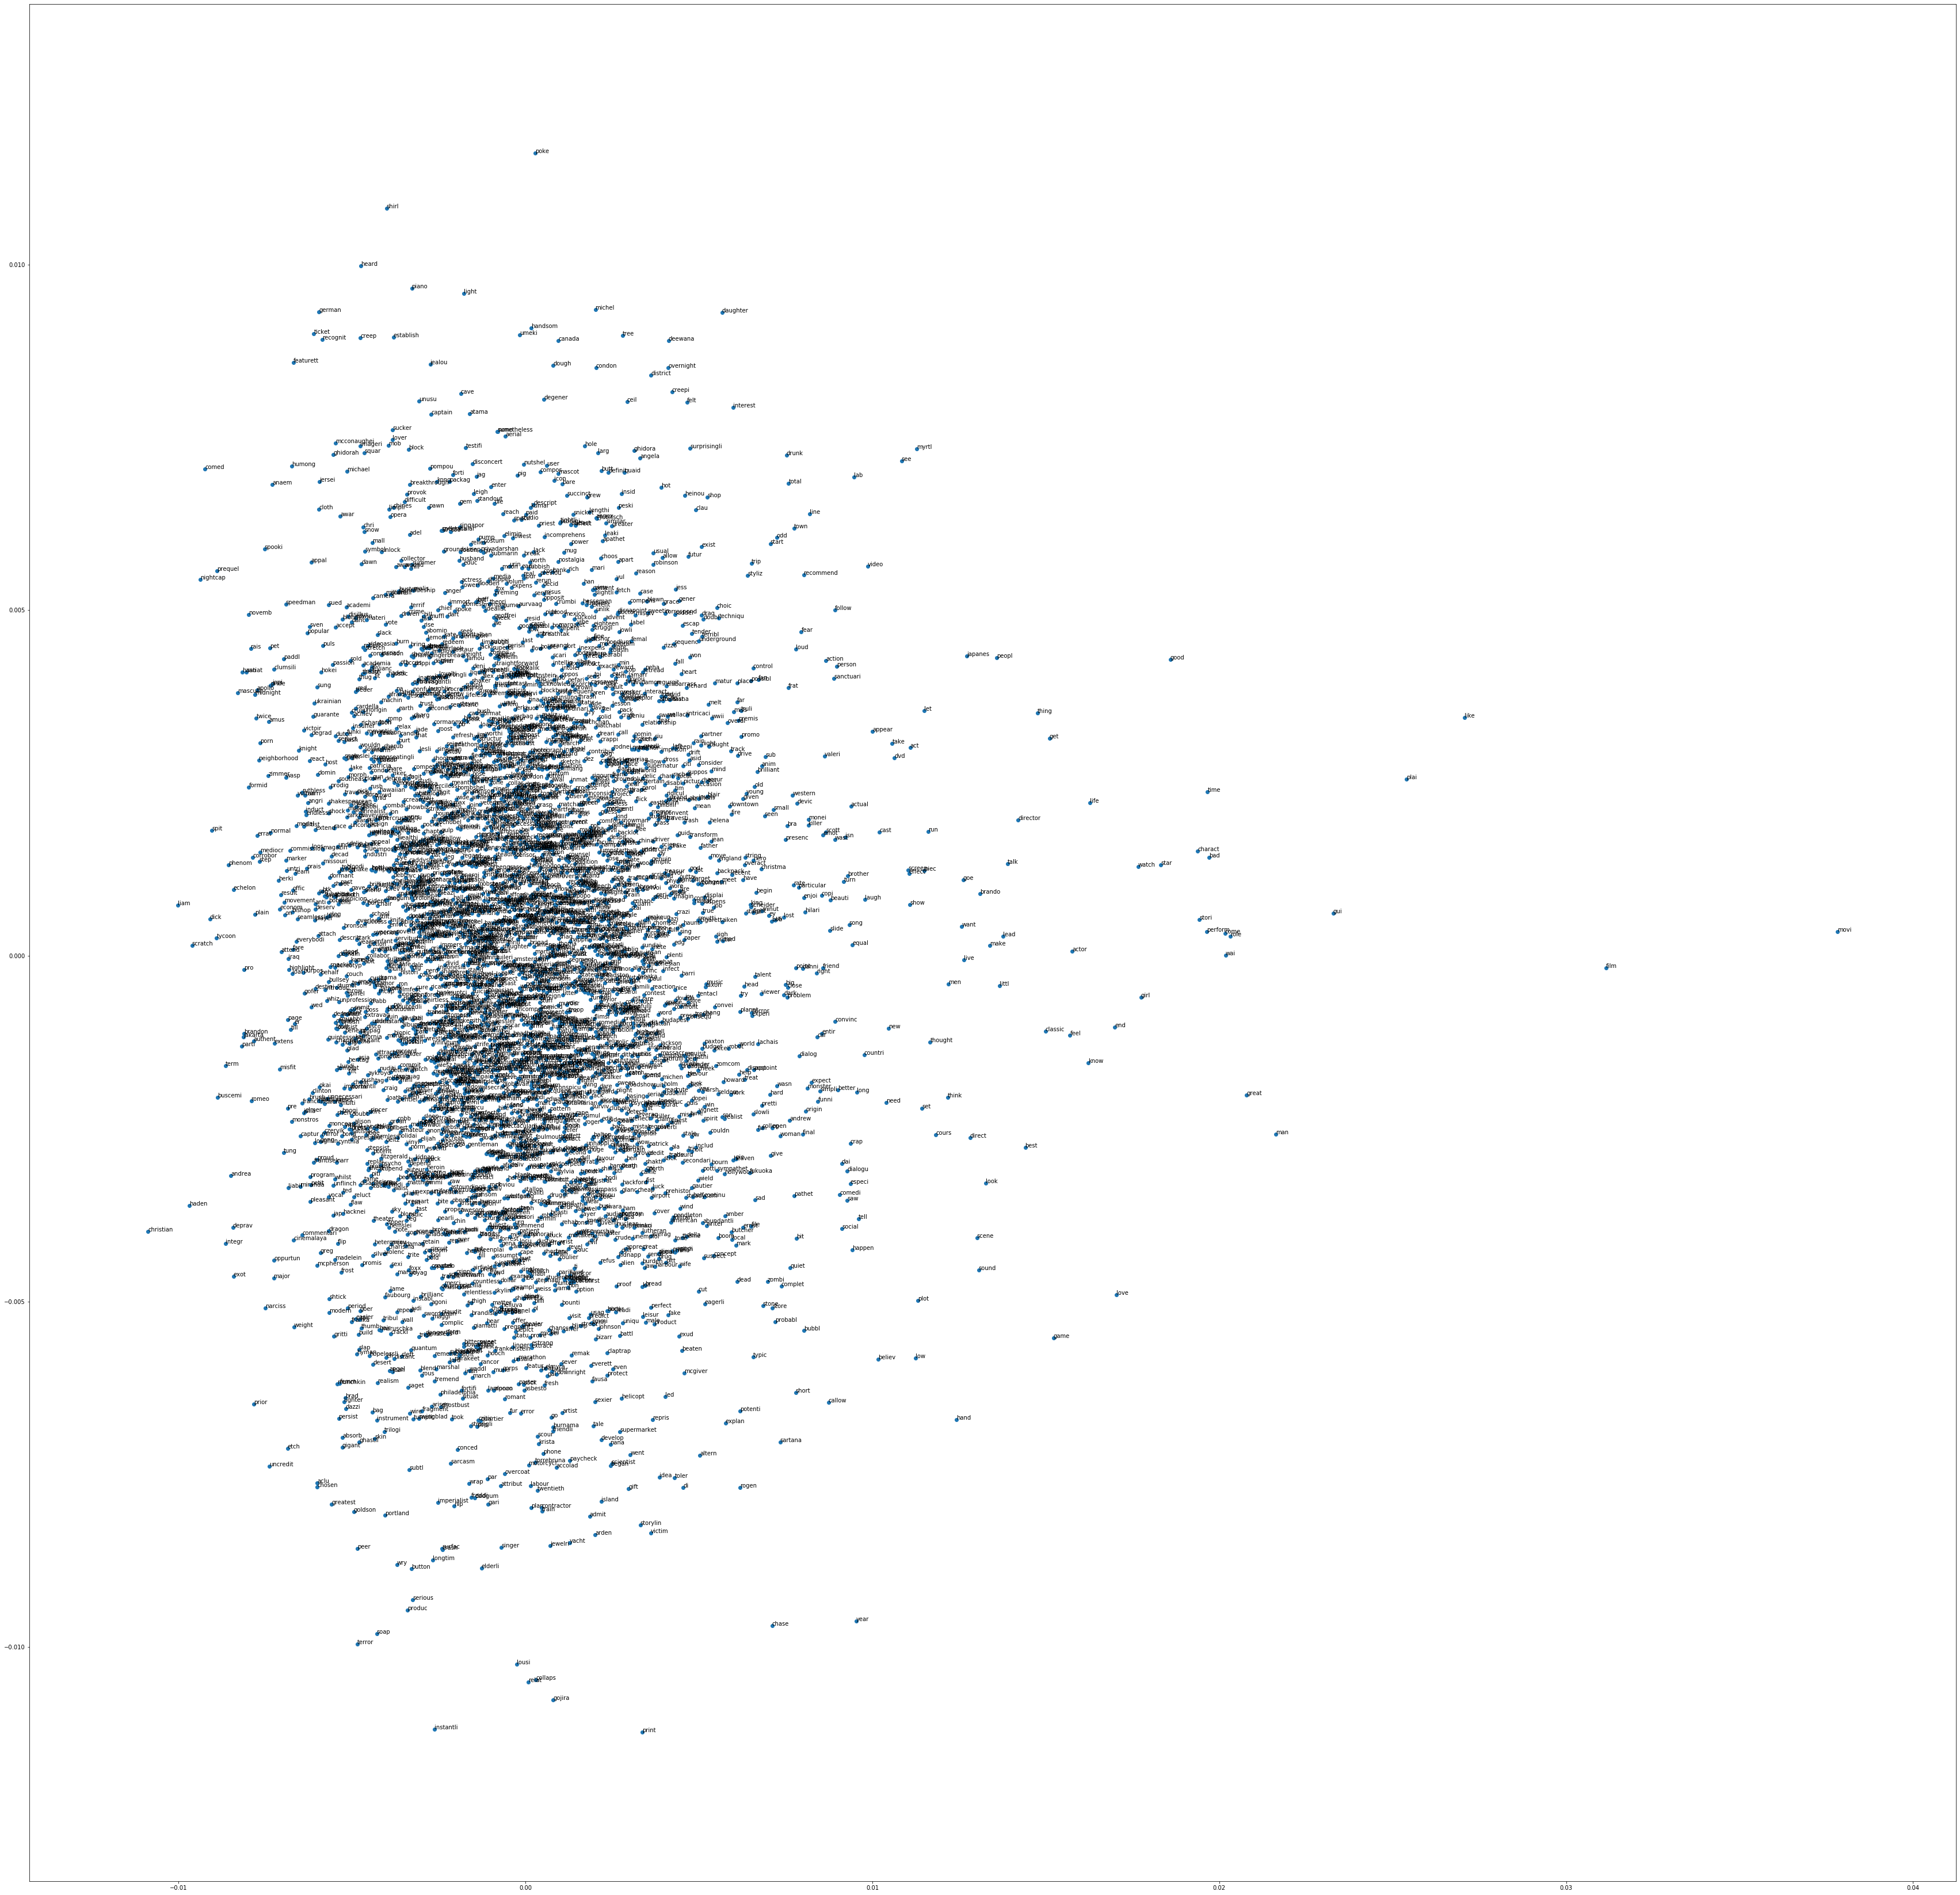

[('movi', 0.4302268326282501), ('loud', 0.3726627826690674), ('plai', 0.3699086308479309), ('dead', 0.3418101668357849), ('sadli', 0.3346783220767975)]

[('movi', 0.43933993577957153), ('girl', 0.4162861704826355), ('screen', 0.3886321783065796)]

[('girlfriend', 0.3639848828315735), ('woeful', 0.3526015281677246), ('map', 0.3200227916240692)]



In [22]:
## PLOT AND ANALYZE DOWNSAMPLED W2V
from sklearn.decomposition import PCA
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")

w2v_model_small = Word2Vec.load('w2v_model_100.bin')
print(w2v_model_small)
XSmall = w2v_model_small[w2v_model_small.wv.vocab]

# fit a 2D PCA model to the vectors
pcaSmall = PCA(n_components=2)
resultSmall = pcaSmall.fit_transform(XSmall)

# create a scatter plot of the projection
pyplot.scatter(resultSmall[:, 0], resultSmall[:, 1])
pyplot.rcParams["figure.figsize"] = (60,60)
# pyplot.plot([-0.015,0.015], [-0.015,0.015])
wordsSmall = list(w2v_model_small.wv.vocab)
for i, word in enumerate(wordsSmall):
    pyplot.annotate(word, xy=(resultSmall[i, 0], resultSmall[i, 1]))
pyplot.savefig('w2v_100.png')
pyplot.show()

print(str(w2v_model_small.wv.most_similar(positive = "funni", topn = 5)) + "\n") 
print(str(w2v_model_small.wv.most_similar(positive = "director", topn = 3)) + "\n") 
#print(str(w2v_model_small.wv.most_similar(positive = ['food', 'bad'], topn = 3)) + "\n")
print(str(w2v_model_small.wv.most_similar(positive = ['woman', 'king'], negative = ['man'], topn = 3)) + "\n")

 ### 3.2 Word2Vec: Neural Net

In [23]:
# !python -m pip install -U keras
#!python -m pip install -U tensorflow
import os
from keras.models import Sequential
from keras import layers

Using TensorFlow backend.


In [70]:
import numpy as np
# text_data = df.drop(['sentiment'], axis = 1)
# labels = df.drop(['review'], axis = 1)

text_data = df['review'].values
labels = df['sentiment'].values 

docs_train, docs_test, y_train, y_test = train_test_split(text_data, labels, test_size=0.2, random_state=1000)
docs_train, docs_val, y_train, y_val = train_test_split(docs_train, y_train, test_size=0.1, random_state=1000)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(docs_train)
X_test = vectorizer.transform(docs_test)
X_val = vectorizer.transform(docs_val)

input_dim = X_train.shape[1]
print(input_dim)
nn_model = Sequential()
nn_model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
nn_model.add(layers.Dense(1, activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.summary()


88808
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 10)                888090    
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 11        
Total params: 888,101
Trainable params: 888,101
Non-trainable params: 0
_________________________________________________________________


In [73]:
"""
print("docs_train " + str(np.shape(docs_train)))
print("docs_test  " + str(np.shape(docs_test)))
print("X_test     " + str(np.shape(X_test)))
print("docs_val   " + str(np.shape(docs_val)))
print("X_train    " + str(np.shape(X_train)))
print("y_train    " + str(np.shape(y_train)))
print("X_val      " + str(np.shape(X_val)))
print("y_val      " + str(np.shape(y_val)))
"""
nn_model.fit(X_train, y_train, epochs=10, 
          validation_data=(X_val, y_val), ## specifying the validation set 
          batch_size=10)

Train on 36000 samples, validate on 4000 samples
Epoch 1/10


 5180/36000 [===>..........................] - ETA: 1:24 - loss: 0.0555 - accuracy: 1.00 - ETA: 1:17 - loss: 0.0589 - accuracy: 1.00 - ETA: 1:17 - loss: 0.0471 - accuracy: 1.00 - ETA: 1:15 - loss: 0.0448 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0599 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0528 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0498 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0453 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0443 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0435 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0400 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0381 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0380 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0372 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0377 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0379 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0384 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0391 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0380 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0379 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0382 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0369 - ac

 9020/36000 [======>.......................] - ETA: 1:08 - loss: 0.0491 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0506 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0509 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0509 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0508 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0505 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0510 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0511 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0509 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0509 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0508 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0507 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0506 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0504 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0502 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0501 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0501 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0504 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0502 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0504 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0503 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0501 - ac

12730/36000 [=========>....................] - ETA: 1:07 - loss: 0.0543 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0545 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0545 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0546 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0547 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0546 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0546 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0546 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0545 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0544 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0545 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0552 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0551 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0553 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0555 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0556 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0555 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0555 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0554 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0553 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0554 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0553 - ac

16330/36000 [============>.................] - ETA: 1:01 - loss: 0.0596 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0595 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0594 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0593 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0595 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0594 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0594 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0596 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0597 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0596 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0596 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0597 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0596 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0597 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0596 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0597 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0597 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0597 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0598 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0598 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0597 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0599 - ac

20050/36000 [===============>..............] - ETA: 56s - loss: 0.0636 - accuracy: 0.979 - ETA: 56s - loss: 0.0635 - accuracy: 0.979 - ETA: 56s - loss: 0.0635 - accuracy: 0.979 - ETA: 56s - loss: 0.0634 - accuracy: 0.979 - ETA: 56s - loss: 0.0634 - accuracy: 0.979 - ETA: 56s - loss: 0.0633 - accuracy: 0.979 - ETA: 56s - loss: 0.0633 - accuracy: 0.979 - ETA: 56s - loss: 0.0633 - accuracy: 0.979 - ETA: 56s - loss: 0.0633 - accuracy: 0.979 - ETA: 56s - loss: 0.0632 - accuracy: 0.979 - ETA: 56s - loss: 0.0634 - accuracy: 0.979 - ETA: 56s - loss: 0.0633 - accuracy: 0.979 - ETA: 56s - loss: 0.0633 - accuracy: 0.979 - ETA: 55s - loss: 0.0632 - accuracy: 0.979 - ETA: 55s - loss: 0.0631 - accuracy: 0.979 - ETA: 55s - loss: 0.0635 - accuracy: 0.979 - ETA: 55s - loss: 0.0635 - accuracy: 0.979 - ETA: 55s - loss: 0.0635 - accuracy: 0.979 - ETA: 55s - loss: 0.0635 - accuracy: 0.979 - ETA: 55s - loss: 0.0635 - accuracy: 0.979 - ETA: 55s - loss: 0.0635 - accuracy: 0.979 - ETA: 55s - loss: 0.0636 - acc

23760/36000 [==================>...........] - ETA: 46s - loss: 0.0658 - accuracy: 0.978 - ETA: 46s - loss: 0.0658 - accuracy: 0.978 - ETA: 46s - loss: 0.0658 - accuracy: 0.978 - ETA: 46s - loss: 0.0660 - accuracy: 0.978 - ETA: 46s - loss: 0.0660 - accuracy: 0.978 - ETA: 46s - loss: 0.0659 - accuracy: 0.978 - ETA: 46s - loss: 0.0659 - accuracy: 0.978 - ETA: 46s - loss: 0.0659 - accuracy: 0.978 - ETA: 46s - loss: 0.0659 - accuracy: 0.978 - ETA: 46s - loss: 0.0661 - accuracy: 0.978 - ETA: 46s - loss: 0.0660 - accuracy: 0.978 - ETA: 46s - loss: 0.0660 - accuracy: 0.978 - ETA: 46s - loss: 0.0659 - accuracy: 0.978 - ETA: 46s - loss: 0.0659 - accuracy: 0.978 - ETA: 46s - loss: 0.0660 - accuracy: 0.978 - ETA: 45s - loss: 0.0659 - accuracy: 0.978 - ETA: 45s - loss: 0.0659 - accuracy: 0.978 - ETA: 45s - loss: 0.0658 - accuracy: 0.978 - ETA: 45s - loss: 0.0660 - accuracy: 0.978 - ETA: 45s - loss: 0.0659 - accuracy: 0.978 - ETA: 45s - loss: 0.0660 - accuracy: 0.978 - ETA: 45s - loss: 0.0660 - acc

27450/36000 [=====================>........] - ETA: 36s - loss: 0.0676 - accuracy: 0.977 - ETA: 36s - loss: 0.0676 - accuracy: 0.977 - ETA: 36s - loss: 0.0677 - accuracy: 0.977 - ETA: 36s - loss: 0.0679 - accuracy: 0.977 - ETA: 35s - loss: 0.0679 - accuracy: 0.977 - ETA: 35s - loss: 0.0679 - accuracy: 0.977 - ETA: 35s - loss: 0.0679 - accuracy: 0.977 - ETA: 35s - loss: 0.0679 - accuracy: 0.977 - ETA: 35s - loss: 0.0679 - accuracy: 0.977 - ETA: 35s - loss: 0.0679 - accuracy: 0.977 - ETA: 35s - loss: 0.0679 - accuracy: 0.977 - ETA: 35s - loss: 0.0678 - accuracy: 0.977 - ETA: 35s - loss: 0.0678 - accuracy: 0.977 - ETA: 35s - loss: 0.0678 - accuracy: 0.977 - ETA: 35s - loss: 0.0678 - accuracy: 0.977 - ETA: 35s - loss: 0.0678 - accuracy: 0.977 - ETA: 35s - loss: 0.0678 - accuracy: 0.977 - ETA: 35s - loss: 0.0677 - accuracy: 0.977 - ETA: 35s - loss: 0.0678 - accuracy: 0.977 - ETA: 35s - loss: 0.0678 - accuracy: 0.977 - ETA: 35s - loss: 0.0678 - accuracy: 0.977 - ETA: 35s - loss: 0.0679 - acc

31120/36000 [========================>.....] - ETA: 25s - loss: 0.0682 - accuracy: 0.976 - ETA: 25s - loss: 0.0682 - accuracy: 0.976 - ETA: 25s - loss: 0.0682 - accuracy: 0.976 - ETA: 25s - loss: 0.0681 - accuracy: 0.976 - ETA: 25s - loss: 0.0681 - accuracy: 0.976 - ETA: 25s - loss: 0.0681 - accuracy: 0.976 - ETA: 25s - loss: 0.0681 - accuracy: 0.976 - ETA: 25s - loss: 0.0682 - accuracy: 0.976 - ETA: 25s - loss: 0.0682 - accuracy: 0.976 - ETA: 25s - loss: 0.0682 - accuracy: 0.976 - ETA: 25s - loss: 0.0681 - accuracy: 0.976 - ETA: 25s - loss: 0.0681 - accuracy: 0.976 - ETA: 25s - loss: 0.0681 - accuracy: 0.976 - ETA: 24s - loss: 0.0680 - accuracy: 0.976 - ETA: 24s - loss: 0.0680 - accuracy: 0.976 - ETA: 24s - loss: 0.0680 - accuracy: 0.976 - ETA: 24s - loss: 0.0679 - accuracy: 0.976 - ETA: 24s - loss: 0.0679 - accuracy: 0.976 - ETA: 24s - loss: 0.0680 - accuracy: 0.976 - ETA: 24s - loss: 0.0680 - accuracy: 0.976 - ETA: 24s - loss: 0.0680 - accuracy: 0.976 - ETA: 24s - loss: 0.0680 - acc

34780/36000 [===========================>..] - ETA: 14s - loss: 0.0687 - accuracy: 0.976 - ETA: 14s - loss: 0.0687 - accuracy: 0.976 - ETA: 14s - loss: 0.0687 - accuracy: 0.976 - ETA: 14s - loss: 0.0687 - accuracy: 0.976 - ETA: 14s - loss: 0.0687 - accuracy: 0.976 - ETA: 14s - loss: 0.0687 - accuracy: 0.976 - ETA: 14s - loss: 0.0687 - accuracy: 0.976 - ETA: 14s - loss: 0.0687 - accuracy: 0.976 - ETA: 14s - loss: 0.0688 - accuracy: 0.976 - ETA: 14s - loss: 0.0687 - accuracy: 0.976 - ETA: 14s - loss: 0.0687 - accuracy: 0.976 - ETA: 14s - loss: 0.0688 - accuracy: 0.976 - ETA: 14s - loss: 0.0687 - accuracy: 0.976 - ETA: 14s - loss: 0.0687 - accuracy: 0.976 - ETA: 14s - loss: 0.0687 - accuracy: 0.976 - ETA: 13s - loss: 0.0687 - accuracy: 0.976 - ETA: 13s - loss: 0.0687 - accuracy: 0.976 - ETA: 13s - loss: 0.0687 - accuracy: 0.976 - ETA: 13s - loss: 0.0687 - accuracy: 0.976 - ETA: 13s - loss: 0.0688 - accuracy: 0.976 - ETA: 13s - loss: 0.0687 - accuracy: 0.976 - ETA: 13s - loss: 0.0687 - acc

36000/36000 [==============================] - ETA: 3s - loss: 0.0698 - accuracy: 0.97 - ETA: 3s - loss: 0.0698 - accuracy: 0.97 - ETA: 3s - loss: 0.0698 - accuracy: 0.97 - ETA: 3s - loss: 0.0698 - accuracy: 0.97 - ETA: 3s - loss: 0.0698 - accuracy: 0.97 - ETA: 3s - loss: 0.0698 - accuracy: 0.97 - ETA: 3s - loss: 0.0698 - accuracy: 0.97 - ETA: 3s - loss: 0.0698 - accuracy: 0.97 - ETA: 3s - loss: 0.0697 - accuracy: 0.97 - ETA: 3s - loss: 0.0697 - accuracy: 0.97 - ETA: 3s - loss: 0.0697 - accuracy: 0.97 - ETA: 3s - loss: 0.0697 - accuracy: 0.97 - ETA: 2s - loss: 0.0696 - accuracy: 0.97 - ETA: 2s - loss: 0.0697 - accuracy: 0.97 - ETA: 2s - loss: 0.0697 - accuracy: 0.97 - ETA: 2s - loss: 0.0697 - accuracy: 0.97 - ETA: 2s - loss: 0.0696 - accuracy: 0.97 - ETA: 2s - loss: 0.0696 - accuracy: 0.97 - ETA: 2s - loss: 0.0696 - accuracy: 0.97 - ETA: 2s - loss: 0.0696 - accuracy: 0.97 - ETA: 2s - loss: 0.0696 - accuracy: 0.97 - ETA: 2s - loss: 0.0696 - accuracy: 0.97 - ETA: 2s - loss: 0.0696 - accu

 3600/36000 [==>...........................] - ETA: 1:29 - loss: 0.0058 - accuracy: 1.00 - ETA: 1:35 - loss: 0.0068 - accuracy: 1.00 - ETA: 1:36 - loss: 0.0103 - accuracy: 1.00 - ETA: 1:41 - loss: 0.0090 - accuracy: 1.00 - ETA: 1:44 - loss: 0.0106 - accuracy: 1.00 - ETA: 1:46 - loss: 0.0120 - accuracy: 1.00 - ETA: 1:50 - loss: 0.0199 - accuracy: 0.99 - ETA: 1:53 - loss: 0.0252 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0301 - accuracy: 0.98 - ETA: 1:57 - loss: 0.0308 - accuracy: 0.98 - ETA: 1:59 - loss: 0.0300 - accuracy: 0.99 - ETA: 2:01 - loss: 0.0346 - accuracy: 0.98 - ETA: 2:02 - loss: 0.0331 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0310 - accuracy: 0.98 - ETA: 2:05 - loss: 0.0313 - accuracy: 0.98 - ETA: 2:07 - loss: 0.0312 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0320 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0346 - accuracy: 0.98 - ETA: 2:08 - loss: 0.0353 - accuracy: 0.98 - ETA: 2:08 - loss: 0.0343 - accuracy: 0.98 - ETA: 2:09 - loss: 0.0359 - accuracy: 0.98 - ETA: 2:10 - loss: 0.0379 - ac

 7310/36000 [=====>........................] - ETA: 2:01 - loss: 0.0284 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0282 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0284 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0284 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0282 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0282 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0281 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0280 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0283 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0282 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0281 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0282 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0281 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0280 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0280 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0283 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0283 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0283 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0282 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0282 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0281 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0279 - ac

11010/36000 [========>.....................] - ETA: 1:41 - loss: 0.0290 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0289 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0289 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0288 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0287 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0287 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0288 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0287 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0287 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0286 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0286 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0287 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0287 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0287 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0286 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0286 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0286 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0285 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0285 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0284 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0284 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0284 - ac

14710/36000 [===========>..................] - ETA: 1:26 - loss: 0.0279 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0279 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0278 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0278 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0278 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0277 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0277 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0277 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0277 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0276 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0276 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0276 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0275 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0275 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0275 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0275 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0275 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0275 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0276 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0276 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0276 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0276 - ac

18380/36000 [==============>...............] - ETA: 1:13 - loss: 0.0277 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0277 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0277 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0277 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0276 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0276 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0276 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0276 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0276 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0276 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0276 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0276 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0277 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0277 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0277 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0276 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0276 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0277 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0276 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0278 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0277 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0277 - ac

22070/36000 [=================>............] - ETA: 1:00 - loss: 0.0272 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0272 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0272 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0272 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0272 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0272 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0272 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0271 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0271 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0272 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0271 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0273 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0272 - accuracy: 0.99 - ETA: 59s - loss: 0.0272 - accuracy: 0.9923 - ETA: 59s - loss: 0.0272 - accuracy: 0.992 - ETA: 59s - loss: 0.0274 - accuracy: 0.992 - ETA: 59s - loss: 0.0274 - accuracy: 0.992 - ETA: 59s - loss: 0.0274 - accuracy: 0.992 - ETA: 59s - loss: 0.0274 - accuracy: 0.992 - ETA: 59s - loss: 0.0276 - accuracy: 0.992 - ETA: 59s - loss: 0.0276 - accuracy: 0.992 - ETA: 59s - loss: 0.0276 - ac

25780/36000 [====================>.........] - ETA: 48s - loss: 0.0298 - accuracy: 0.991 - ETA: 48s - loss: 0.0297 - accuracy: 0.991 - ETA: 47s - loss: 0.0297 - accuracy: 0.991 - ETA: 47s - loss: 0.0298 - accuracy: 0.991 - ETA: 47s - loss: 0.0297 - accuracy: 0.991 - ETA: 47s - loss: 0.0297 - accuracy: 0.991 - ETA: 47s - loss: 0.0297 - accuracy: 0.991 - ETA: 47s - loss: 0.0297 - accuracy: 0.991 - ETA: 47s - loss: 0.0297 - accuracy: 0.991 - ETA: 47s - loss: 0.0298 - accuracy: 0.991 - ETA: 47s - loss: 0.0298 - accuracy: 0.991 - ETA: 47s - loss: 0.0298 - accuracy: 0.991 - ETA: 47s - loss: 0.0298 - accuracy: 0.991 - ETA: 47s - loss: 0.0298 - accuracy: 0.991 - ETA: 47s - loss: 0.0298 - accuracy: 0.991 - ETA: 47s - loss: 0.0297 - accuracy: 0.991 - ETA: 46s - loss: 0.0297 - accuracy: 0.991 - ETA: 46s - loss: 0.0297 - accuracy: 0.991 - ETA: 46s - loss: 0.0298 - accuracy: 0.991 - ETA: 46s - loss: 0.0298 - accuracy: 0.991 - ETA: 46s - loss: 0.0298 - accuracy: 0.991 - ETA: 46s - loss: 0.0298 - acc

29490/36000 [=======================>......] - ETA: 34s - loss: 0.0304 - accuracy: 0.991 - ETA: 34s - loss: 0.0304 - accuracy: 0.991 - ETA: 34s - loss: 0.0304 - accuracy: 0.991 - ETA: 34s - loss: 0.0304 - accuracy: 0.991 - ETA: 34s - loss: 0.0304 - accuracy: 0.991 - ETA: 34s - loss: 0.0304 - accuracy: 0.991 - ETA: 34s - loss: 0.0304 - accuracy: 0.991 - ETA: 34s - loss: 0.0303 - accuracy: 0.991 - ETA: 34s - loss: 0.0303 - accuracy: 0.991 - ETA: 34s - loss: 0.0304 - accuracy: 0.991 - ETA: 34s - loss: 0.0304 - accuracy: 0.991 - ETA: 34s - loss: 0.0304 - accuracy: 0.991 - ETA: 34s - loss: 0.0305 - accuracy: 0.991 - ETA: 33s - loss: 0.0305 - accuracy: 0.991 - ETA: 33s - loss: 0.0304 - accuracy: 0.991 - ETA: 33s - loss: 0.0305 - accuracy: 0.991 - ETA: 33s - loss: 0.0304 - accuracy: 0.991 - ETA: 33s - loss: 0.0305 - accuracy: 0.991 - ETA: 33s - loss: 0.0304 - accuracy: 0.991 - ETA: 33s - loss: 0.0304 - accuracy: 0.991 - ETA: 33s - loss: 0.0304 - accuracy: 0.991 - ETA: 33s - loss: 0.0304 - acc

33160/36000 [==========================>...] - ETA: 22s - loss: 0.0317 - accuracy: 0.990 - ETA: 22s - loss: 0.0317 - accuracy: 0.990 - ETA: 21s - loss: 0.0317 - accuracy: 0.990 - ETA: 21s - loss: 0.0317 - accuracy: 0.990 - ETA: 21s - loss: 0.0317 - accuracy: 0.990 - ETA: 21s - loss: 0.0317 - accuracy: 0.990 - ETA: 21s - loss: 0.0317 - accuracy: 0.990 - ETA: 21s - loss: 0.0317 - accuracy: 0.990 - ETA: 21s - loss: 0.0317 - accuracy: 0.990 - ETA: 21s - loss: 0.0317 - accuracy: 0.990 - ETA: 21s - loss: 0.0317 - accuracy: 0.990 - ETA: 21s - loss: 0.0317 - accuracy: 0.990 - ETA: 21s - loss: 0.0316 - accuracy: 0.990 - ETA: 21s - loss: 0.0316 - accuracy: 0.990 - ETA: 21s - loss: 0.0317 - accuracy: 0.990 - ETA: 21s - loss: 0.0317 - accuracy: 0.990 - ETA: 21s - loss: 0.0317 - accuracy: 0.990 - ETA: 21s - loss: 0.0317 - accuracy: 0.990 - ETA: 21s - loss: 0.0317 - accuracy: 0.990 - ETA: 20s - loss: 0.0317 - accuracy: 0.990 - ETA: 20s - loss: 0.0317 - accuracy: 0.990 - ETA: 20s - loss: 0.0317 - acc

36000/36000 [==============================] - ETA: 9s - loss: 0.0338 - accuracy: 0.98 - ETA: 9s - loss: 0.0338 - accuracy: 0.98 - ETA: 9s - loss: 0.0338 - accuracy: 0.98 - ETA: 9s - loss: 0.0338 - accuracy: 0.98 - ETA: 9s - loss: 0.0338 - accuracy: 0.98 - ETA: 9s - loss: 0.0338 - accuracy: 0.98 - ETA: 9s - loss: 0.0338 - accuracy: 0.98 - ETA: 9s - loss: 0.0338 - accuracy: 0.98 - ETA: 9s - loss: 0.0338 - accuracy: 0.98 - ETA: 8s - loss: 0.0339 - accuracy: 0.98 - ETA: 8s - loss: 0.0338 - accuracy: 0.98 - ETA: 8s - loss: 0.0338 - accuracy: 0.98 - ETA: 8s - loss: 0.0338 - accuracy: 0.98 - ETA: 8s - loss: 0.0339 - accuracy: 0.98 - ETA: 8s - loss: 0.0339 - accuracy: 0.98 - ETA: 8s - loss: 0.0339 - accuracy: 0.98 - ETA: 8s - loss: 0.0339 - accuracy: 0.98 - ETA: 8s - loss: 0.0339 - accuracy: 0.98 - ETA: 8s - loss: 0.0339 - accuracy: 0.98 - ETA: 8s - loss: 0.0339 - accuracy: 0.98 - ETA: 8s - loss: 0.0339 - accuracy: 0.98 - ETA: 8s - loss: 0.0340 - accuracy: 0.98 - ETA: 8s - loss: 0.0340 - accu

 3700/36000 [==>...........................] - ETA: 1:26 - loss: 0.0011 - accuracy: 1.00 - ETA: 1:24 - loss: 0.0105 - accuracy: 1.00 - ETA: 1:28 - loss: 0.0082 - accuracy: 1.00 - ETA: 1:30 - loss: 0.0112 - accuracy: 1.00 - ETA: 1:34 - loss: 0.0101 - accuracy: 1.00 - ETA: 1:36 - loss: 0.0092 - accuracy: 1.00 - ETA: 1:39 - loss: 0.0256 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0236 - accuracy: 0.99 - ETA: 1:43 - loss: 0.0249 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0263 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0241 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0225 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0210 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0197 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0186 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0191 - accuracy: 0.99 - ETA: 1:53 - loss: 0.0194 - accuracy: 0.99 - ETA: 1:53 - loss: 0.0184 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0183 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0185 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0178 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0174 - ac

 7420/36000 [=====>........................] - ETA: 1:49 - loss: 0.0159 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0159 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0158 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0158 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0160 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0160 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0159 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0159 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0158 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0158 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0157 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0157 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0158 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0157 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0157 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0156 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0156 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0155 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0154 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0154 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0154 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0154 - ac

11140/36000 [========>.....................] - ETA: 1:33 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0133 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0133 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0135 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0135 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0140 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0140 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0140 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0139 - ac

14860/36000 [===========>..................] - ETA: 1:20 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0143 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0143 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0143 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0143 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0145 - ac

18570/36000 [==============>...............] - ETA: 1:08 - loss: 0.0143 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0143 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0143 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0143 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0144 - ac

22290/36000 [=================>............] - ETA: 56s - loss: 0.0149 - accuracy: 0.995 - ETA: 56s - loss: 0.0149 - accuracy: 0.995 - ETA: 56s - loss: 0.0149 - accuracy: 0.995 - ETA: 56s - loss: 0.0149 - accuracy: 0.995 - ETA: 56s - loss: 0.0149 - accuracy: 0.995 - ETA: 56s - loss: 0.0149 - accuracy: 0.995 - ETA: 56s - loss: 0.0149 - accuracy: 0.995 - ETA: 56s - loss: 0.0149 - accuracy: 0.995 - ETA: 56s - loss: 0.0149 - accuracy: 0.995 - ETA: 56s - loss: 0.0149 - accuracy: 0.995 - ETA: 56s - loss: 0.0148 - accuracy: 0.995 - ETA: 56s - loss: 0.0148 - accuracy: 0.995 - ETA: 56s - loss: 0.0149 - accuracy: 0.995 - ETA: 56s - loss: 0.0149 - accuracy: 0.995 - ETA: 55s - loss: 0.0149 - accuracy: 0.995 - ETA: 55s - loss: 0.0149 - accuracy: 0.995 - ETA: 55s - loss: 0.0149 - accuracy: 0.995 - ETA: 55s - loss: 0.0149 - accuracy: 0.995 - ETA: 55s - loss: 0.0149 - accuracy: 0.995 - ETA: 55s - loss: 0.0149 - accuracy: 0.995 - ETA: 55s - loss: 0.0148 - accuracy: 0.995 - ETA: 55s - loss: 0.0148 - acc

25940/36000 [====================>.........] - ETA: 44s - loss: 0.0163 - accuracy: 0.995 - ETA: 44s - loss: 0.0165 - accuracy: 0.995 - ETA: 44s - loss: 0.0165 - accuracy: 0.995 - ETA: 44s - loss: 0.0165 - accuracy: 0.995 - ETA: 44s - loss: 0.0165 - accuracy: 0.995 - ETA: 44s - loss: 0.0165 - accuracy: 0.995 - ETA: 44s - loss: 0.0165 - accuracy: 0.995 - ETA: 44s - loss: 0.0165 - accuracy: 0.995 - ETA: 44s - loss: 0.0165 - accuracy: 0.994 - ETA: 44s - loss: 0.0165 - accuracy: 0.994 - ETA: 44s - loss: 0.0165 - accuracy: 0.994 - ETA: 44s - loss: 0.0166 - accuracy: 0.994 - ETA: 44s - loss: 0.0166 - accuracy: 0.994 - ETA: 44s - loss: 0.0166 - accuracy: 0.994 - ETA: 44s - loss: 0.0166 - accuracy: 0.994 - ETA: 43s - loss: 0.0166 - accuracy: 0.994 - ETA: 43s - loss: 0.0166 - accuracy: 0.994 - ETA: 43s - loss: 0.0166 - accuracy: 0.994 - ETA: 43s - loss: 0.0166 - accuracy: 0.994 - ETA: 43s - loss: 0.0166 - accuracy: 0.994 - ETA: 43s - loss: 0.0166 - accuracy: 0.994 - ETA: 43s - loss: 0.0166 - acc

29650/36000 [=======================>......] - ETA: 33s - loss: 0.0166 - accuracy: 0.994 - ETA: 33s - loss: 0.0166 - accuracy: 0.994 - ETA: 33s - loss: 0.0166 - accuracy: 0.994 - ETA: 33s - loss: 0.0166 - accuracy: 0.994 - ETA: 33s - loss: 0.0166 - accuracy: 0.994 - ETA: 32s - loss: 0.0166 - accuracy: 0.994 - ETA: 32s - loss: 0.0166 - accuracy: 0.994 - ETA: 32s - loss: 0.0166 - accuracy: 0.994 - ETA: 32s - loss: 0.0166 - accuracy: 0.994 - ETA: 32s - loss: 0.0166 - accuracy: 0.994 - ETA: 32s - loss: 0.0166 - accuracy: 0.994 - ETA: 32s - loss: 0.0166 - accuracy: 0.994 - ETA: 32s - loss: 0.0166 - accuracy: 0.994 - ETA: 32s - loss: 0.0166 - accuracy: 0.994 - ETA: 32s - loss: 0.0166 - accuracy: 0.994 - ETA: 32s - loss: 0.0166 - accuracy: 0.994 - ETA: 32s - loss: 0.0166 - accuracy: 0.994 - ETA: 32s - loss: 0.0166 - accuracy: 0.994 - ETA: 32s - loss: 0.0166 - accuracy: 0.994 - ETA: 32s - loss: 0.0166 - accuracy: 0.994 - ETA: 31s - loss: 0.0166 - accuracy: 0.994 - ETA: 31s - loss: 0.0166 - acc

33360/36000 [==========================>...] - ETA: 21s - loss: 0.0170 - accuracy: 0.994 - ETA: 20s - loss: 0.0170 - accuracy: 0.994 - ETA: 20s - loss: 0.0170 - accuracy: 0.994 - ETA: 20s - loss: 0.0170 - accuracy: 0.994 - ETA: 20s - loss: 0.0170 - accuracy: 0.994 - ETA: 20s - loss: 0.0171 - accuracy: 0.994 - ETA: 20s - loss: 0.0171 - accuracy: 0.994 - ETA: 20s - loss: 0.0170 - accuracy: 0.994 - ETA: 20s - loss: 0.0170 - accuracy: 0.994 - ETA: 20s - loss: 0.0170 - accuracy: 0.994 - ETA: 20s - loss: 0.0171 - accuracy: 0.994 - ETA: 20s - loss: 0.0171 - accuracy: 0.994 - ETA: 20s - loss: 0.0171 - accuracy: 0.994 - ETA: 20s - loss: 0.0171 - accuracy: 0.994 - ETA: 20s - loss: 0.0171 - accuracy: 0.994 - ETA: 20s - loss: 0.0171 - accuracy: 0.994 - ETA: 20s - loss: 0.0171 - accuracy: 0.994 - ETA: 19s - loss: 0.0171 - accuracy: 0.994 - ETA: 19s - loss: 0.0171 - accuracy: 0.994 - ETA: 19s - loss: 0.0171 - accuracy: 0.994 - ETA: 19s - loss: 0.0171 - accuracy: 0.994 - ETA: 19s - loss: 0.0171 - acc

36000/36000 [==============================] - ETA: 8s - loss: 0.0176 - accuracy: 0.99 - ETA: 8s - loss: 0.0176 - accuracy: 0.99 - ETA: 8s - loss: 0.0176 - accuracy: 0.99 - ETA: 8s - loss: 0.0177 - accuracy: 0.99 - ETA: 8s - loss: 0.0177 - accuracy: 0.99 - ETA: 8s - loss: 0.0177 - accuracy: 0.99 - ETA: 8s - loss: 0.0177 - accuracy: 0.99 - ETA: 8s - loss: 0.0177 - accuracy: 0.99 - ETA: 8s - loss: 0.0177 - accuracy: 0.99 - ETA: 8s - loss: 0.0177 - accuracy: 0.99 - ETA: 8s - loss: 0.0177 - accuracy: 0.99 - ETA: 7s - loss: 0.0177 - accuracy: 0.99 - ETA: 7s - loss: 0.0177 - accuracy: 0.99 - ETA: 7s - loss: 0.0176 - accuracy: 0.99 - ETA: 7s - loss: 0.0177 - accuracy: 0.99 - ETA: 7s - loss: 0.0177 - accuracy: 0.99 - ETA: 7s - loss: 0.0177 - accuracy: 0.99 - ETA: 7s - loss: 0.0177 - accuracy: 0.99 - ETA: 7s - loss: 0.0177 - accuracy: 0.99 - ETA: 7s - loss: 0.0177 - accuracy: 0.99 - ETA: 7s - loss: 0.0177 - accuracy: 0.99 - ETA: 7s - loss: 0.0177 - accuracy: 0.99 - ETA: 7s - loss: 0.0177 - accu

 3720/36000 [==>...........................] - ETA: 1:26 - loss: 0.0029 - accuracy: 1.00 - ETA: 1:33 - loss: 0.0010 - accuracy: 1.00 - ETA: 1:36 - loss: 0.0010 - accuracy: 1.00 - ETA: 1:41 - loss: 0.0016 - accuracy: 1.00 - ETA: 1:44 - loss: 0.0021 - accuracy: 1.00 - ETA: 1:47 - loss: 0.0025 - accuracy: 1.00 - ETA: 1:52 - loss: 0.0024 - accuracy: 1.00 - ETA: 1:56 - loss: 0.0022 - accuracy: 1.00 - ETA: 1:58 - loss: 0.0053 - accuracy: 1.00 - ETA: 1:58 - loss: 0.0052 - accuracy: 1.00 - ETA: 1:58 - loss: 0.0048 - accuracy: 1.00 - ETA: 1:58 - loss: 0.0047 - accuracy: 1.00 - ETA: 1:59 - loss: 0.0043 - accuracy: 1.00 - ETA: 1:58 - loss: 0.0075 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0073 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0071 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0113 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0123 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0117 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0112 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0113 - ac

 7430/36000 [=====>........................] - ETA: 1:45 - loss: 0.0110 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0110 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0110 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0109 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0109 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0114 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0114 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0113 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0113 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0113 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0112 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0112 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0111 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0111 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0110 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0110 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0110 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0109 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0110 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0110 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0110 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0109 - ac

11140/36000 [========>.....................] - ETA: 1:33 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0081 - ac

14860/36000 [===========>..................] - ETA: 1:21 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0078 - ac

18580/36000 [==============>...............] - ETA: 1:09 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0080 - ac

22300/36000 [=================>............] - ETA: 57s - loss: 0.0091 - accuracy: 0.997 - ETA: 57s - loss: 0.0091 - accuracy: 0.997 - ETA: 57s - loss: 0.0091 - accuracy: 0.997 - ETA: 57s - loss: 0.0091 - accuracy: 0.997 - ETA: 57s - loss: 0.0091 - accuracy: 0.997 - ETA: 57s - loss: 0.0091 - accuracy: 0.997 - ETA: 57s - loss: 0.0091 - accuracy: 0.997 - ETA: 57s - loss: 0.0091 - accuracy: 0.997 - ETA: 56s - loss: 0.0091 - accuracy: 0.997 - ETA: 56s - loss: 0.0091 - accuracy: 0.997 - ETA: 56s - loss: 0.0091 - accuracy: 0.997 - ETA: 56s - loss: 0.0091 - accuracy: 0.997 - ETA: 56s - loss: 0.0091 - accuracy: 0.997 - ETA: 56s - loss: 0.0091 - accuracy: 0.997 - ETA: 56s - loss: 0.0091 - accuracy: 0.997 - ETA: 56s - loss: 0.0091 - accuracy: 0.997 - ETA: 56s - loss: 0.0091 - accuracy: 0.997 - ETA: 56s - loss: 0.0091 - accuracy: 0.997 - ETA: 56s - loss: 0.0091 - accuracy: 0.997 - ETA: 56s - loss: 0.0091 - accuracy: 0.997 - ETA: 56s - loss: 0.0091 - accuracy: 0.997 - ETA: 56s - loss: 0.0091 - acc

26040/36000 [====================>.........] - ETA: 44s - loss: 0.0114 - accuracy: 0.996 - ETA: 44s - loss: 0.0114 - accuracy: 0.996 - ETA: 44s - loss: 0.0114 - accuracy: 0.996 - ETA: 44s - loss: 0.0114 - accuracy: 0.996 - ETA: 44s - loss: 0.0114 - accuracy: 0.996 - ETA: 44s - loss: 0.0114 - accuracy: 0.996 - ETA: 44s - loss: 0.0113 - accuracy: 0.996 - ETA: 44s - loss: 0.0114 - accuracy: 0.996 - ETA: 44s - loss: 0.0114 - accuracy: 0.996 - ETA: 44s - loss: 0.0114 - accuracy: 0.996 - ETA: 44s - loss: 0.0114 - accuracy: 0.996 - ETA: 44s - loss: 0.0114 - accuracy: 0.996 - ETA: 44s - loss: 0.0114 - accuracy: 0.996 - ETA: 44s - loss: 0.0114 - accuracy: 0.996 - ETA: 44s - loss: 0.0114 - accuracy: 0.996 - ETA: 43s - loss: 0.0114 - accuracy: 0.996 - ETA: 43s - loss: 0.0114 - accuracy: 0.996 - ETA: 43s - loss: 0.0114 - accuracy: 0.996 - ETA: 43s - loss: 0.0114 - accuracy: 0.996 - ETA: 43s - loss: 0.0114 - accuracy: 0.996 - ETA: 43s - loss: 0.0113 - accuracy: 0.996 - ETA: 43s - loss: 0.0113 - acc

29760/36000 [=======================>......] - ETA: 32s - loss: 0.0116 - accuracy: 0.996 - ETA: 32s - loss: 0.0116 - accuracy: 0.996 - ETA: 32s - loss: 0.0116 - accuracy: 0.996 - ETA: 32s - loss: 0.0116 - accuracy: 0.996 - ETA: 32s - loss: 0.0116 - accuracy: 0.996 - ETA: 32s - loss: 0.0116 - accuracy: 0.996 - ETA: 32s - loss: 0.0116 - accuracy: 0.996 - ETA: 32s - loss: 0.0116 - accuracy: 0.996 - ETA: 31s - loss: 0.0115 - accuracy: 0.996 - ETA: 31s - loss: 0.0115 - accuracy: 0.996 - ETA: 31s - loss: 0.0115 - accuracy: 0.996 - ETA: 31s - loss: 0.0116 - accuracy: 0.996 - ETA: 31s - loss: 0.0116 - accuracy: 0.996 - ETA: 31s - loss: 0.0117 - accuracy: 0.996 - ETA: 31s - loss: 0.0117 - accuracy: 0.996 - ETA: 31s - loss: 0.0117 - accuracy: 0.996 - ETA: 31s - loss: 0.0117 - accuracy: 0.996 - ETA: 31s - loss: 0.0117 - accuracy: 0.996 - ETA: 31s - loss: 0.0117 - accuracy: 0.996 - ETA: 31s - loss: 0.0117 - accuracy: 0.996 - ETA: 31s - loss: 0.0117 - accuracy: 0.996 - ETA: 31s - loss: 0.0117 - acc

33490/36000 [==========================>...] - ETA: 20s - loss: 0.0114 - accuracy: 0.996 - ETA: 20s - loss: 0.0114 - accuracy: 0.996 - ETA: 20s - loss: 0.0114 - accuracy: 0.996 - ETA: 20s - loss: 0.0114 - accuracy: 0.996 - ETA: 19s - loss: 0.0114 - accuracy: 0.996 - ETA: 19s - loss: 0.0114 - accuracy: 0.996 - ETA: 19s - loss: 0.0114 - accuracy: 0.996 - ETA: 19s - loss: 0.0114 - accuracy: 0.996 - ETA: 19s - loss: 0.0114 - accuracy: 0.996 - ETA: 19s - loss: 0.0114 - accuracy: 0.996 - ETA: 19s - loss: 0.0114 - accuracy: 0.996 - ETA: 19s - loss: 0.0114 - accuracy: 0.996 - ETA: 19s - loss: 0.0114 - accuracy: 0.996 - ETA: 19s - loss: 0.0114 - accuracy: 0.996 - ETA: 19s - loss: 0.0114 - accuracy: 0.996 - ETA: 19s - loss: 0.0114 - accuracy: 0.996 - ETA: 19s - loss: 0.0114 - accuracy: 0.996 - ETA: 19s - loss: 0.0114 - accuracy: 0.996 - ETA: 19s - loss: 0.0114 - accuracy: 0.996 - ETA: 19s - loss: 0.0114 - accuracy: 0.996 - ETA: 18s - loss: 0.0114 - accuracy: 0.996 - ETA: 18s - loss: 0.0114 - acc

36000/36000 [==============================] - ETA: 8s - loss: 0.0116 - accuracy: 0.99 - ETA: 8s - loss: 0.0115 - accuracy: 0.99 - ETA: 7s - loss: 0.0116 - accuracy: 0.99 - ETA: 7s - loss: 0.0116 - accuracy: 0.99 - ETA: 7s - loss: 0.0116 - accuracy: 0.99 - ETA: 7s - loss: 0.0116 - accuracy: 0.99 - ETA: 7s - loss: 0.0115 - accuracy: 0.99 - ETA: 7s - loss: 0.0116 - accuracy: 0.99 - ETA: 7s - loss: 0.0115 - accuracy: 0.99 - ETA: 7s - loss: 0.0115 - accuracy: 0.99 - ETA: 7s - loss: 0.0116 - accuracy: 0.99 - ETA: 7s - loss: 0.0117 - accuracy: 0.99 - ETA: 7s - loss: 0.0117 - accuracy: 0.99 - ETA: 7s - loss: 0.0117 - accuracy: 0.99 - ETA: 7s - loss: 0.0116 - accuracy: 0.99 - ETA: 7s - loss: 0.0116 - accuracy: 0.99 - ETA: 7s - loss: 0.0116 - accuracy: 0.99 - ETA: 6s - loss: 0.0116 - accuracy: 0.99 - ETA: 6s - loss: 0.0116 - accuracy: 0.99 - ETA: 6s - loss: 0.0116 - accuracy: 0.99 - ETA: 6s - loss: 0.0116 - accuracy: 0.99 - ETA: 6s - loss: 0.0116 - accuracy: 0.99 - ETA: 6s - loss: 0.0116 - accu

 3690/36000 [==>...........................] - ETA: 1:26 - loss: 1.9822e-04 - accuracy: 1.00 - ETA: 1:25 - loss: 4.2129e-04 - accuracy: 1.00 - ETA: 1:28 - loss: 5.5001e-04 - accuracy: 1.00 - ETA: 1:32 - loss: 0.0011 - accuracy: 1.0000   - ETA: 1:33 - loss: 9.3073e-04 - accuracy: 1.00 - ETA: 1:36 - loss: 8.7426e-04 - accuracy: 1.00 - ETA: 1:37 - loss: 0.0023 - accuracy: 1.0000   - ETA: 1:39 - loss: 0.0023 - accuracy: 1.00 - ETA: 1:40 - loss: 0.0021 - accuracy: 1.00 - ETA: 1:41 - loss: 0.0020 - accuracy: 1.00 - ETA: 1:41 - loss: 0.0053 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0049 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0052 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0050 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0047 - accuracy: 0.99 - ETA: 1:43 - loss: 0.0051 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0046 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0044 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0043 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0041 - accuracy: 0.99 - E

 7410/36000 [=====>........................] - ETA: 1:42 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0040 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0039 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0039 - ac

11130/36000 [========>.....................] - ETA: 1:33 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0037 - ac

14850/36000 [===========>..................] - ETA: 1:21 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0047 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0048 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0048 - ac

18570/36000 [==============>...............] - ETA: 1:10 - loss: 0.0050 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0049 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0049 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0049 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0050 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0050 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0049 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0049 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0050 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0050 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0050 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0050 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0049 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0049 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0049 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0050 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0050 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0050 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0050 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0050 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0050 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0050 - ac

22290/36000 [=================>............] - ETA: 58s - loss: 0.0056 - accuracy: 0.998 - ETA: 58s - loss: 0.0056 - accuracy: 0.998 - ETA: 57s - loss: 0.0056 - accuracy: 0.998 - ETA: 57s - loss: 0.0056 - accuracy: 0.998 - ETA: 57s - loss: 0.0056 - accuracy: 0.998 - ETA: 57s - loss: 0.0055 - accuracy: 0.998 - ETA: 57s - loss: 0.0055 - accuracy: 0.998 - ETA: 57s - loss: 0.0055 - accuracy: 0.998 - ETA: 57s - loss: 0.0055 - accuracy: 0.998 - ETA: 57s - loss: 0.0055 - accuracy: 0.998 - ETA: 57s - loss: 0.0055 - accuracy: 0.998 - ETA: 57s - loss: 0.0055 - accuracy: 0.998 - ETA: 57s - loss: 0.0055 - accuracy: 0.998 - ETA: 57s - loss: 0.0055 - accuracy: 0.998 - ETA: 57s - loss: 0.0055 - accuracy: 0.998 - ETA: 57s - loss: 0.0055 - accuracy: 0.998 - ETA: 56s - loss: 0.0055 - accuracy: 0.998 - ETA: 56s - loss: 0.0055 - accuracy: 0.998 - ETA: 56s - loss: 0.0055 - accuracy: 0.998 - ETA: 56s - loss: 0.0055 - accuracy: 0.998 - ETA: 56s - loss: 0.0055 - accuracy: 0.998 - ETA: 56s - loss: 0.0055 - acc

26020/36000 [====================>.........] - ETA: 45s - loss: 0.0057 - accuracy: 0.998 - ETA: 45s - loss: 0.0057 - accuracy: 0.998 - ETA: 45s - loss: 0.0057 - accuracy: 0.998 - ETA: 45s - loss: 0.0057 - accuracy: 0.998 - ETA: 44s - loss: 0.0057 - accuracy: 0.998 - ETA: 44s - loss: 0.0057 - accuracy: 0.998 - ETA: 44s - loss: 0.0057 - accuracy: 0.998 - ETA: 44s - loss: 0.0057 - accuracy: 0.998 - ETA: 44s - loss: 0.0057 - accuracy: 0.998 - ETA: 44s - loss: 0.0057 - accuracy: 0.998 - ETA: 44s - loss: 0.0057 - accuracy: 0.998 - ETA: 44s - loss: 0.0057 - accuracy: 0.998 - ETA: 44s - loss: 0.0057 - accuracy: 0.998 - ETA: 44s - loss: 0.0057 - accuracy: 0.998 - ETA: 44s - loss: 0.0057 - accuracy: 0.998 - ETA: 44s - loss: 0.0057 - accuracy: 0.998 - ETA: 44s - loss: 0.0057 - accuracy: 0.998 - ETA: 44s - loss: 0.0057 - accuracy: 0.998 - ETA: 44s - loss: 0.0057 - accuracy: 0.998 - ETA: 43s - loss: 0.0057 - accuracy: 0.998 - ETA: 43s - loss: 0.0057 - accuracy: 0.998 - ETA: 43s - loss: 0.0057 - acc

29740/36000 [=======================>......] - ETA: 32s - loss: 0.0056 - accuracy: 0.998 - ETA: 32s - loss: 0.0056 - accuracy: 0.998 - ETA: 32s - loss: 0.0056 - accuracy: 0.998 - ETA: 32s - loss: 0.0056 - accuracy: 0.998 - ETA: 32s - loss: 0.0056 - accuracy: 0.998 - ETA: 32s - loss: 0.0056 - accuracy: 0.998 - ETA: 32s - loss: 0.0056 - accuracy: 0.998 - ETA: 32s - loss: 0.0056 - accuracy: 0.998 - ETA: 32s - loss: 0.0056 - accuracy: 0.998 - ETA: 32s - loss: 0.0056 - accuracy: 0.998 - ETA: 32s - loss: 0.0056 - accuracy: 0.998 - ETA: 31s - loss: 0.0057 - accuracy: 0.998 - ETA: 31s - loss: 0.0057 - accuracy: 0.998 - ETA: 31s - loss: 0.0057 - accuracy: 0.998 - ETA: 31s - loss: 0.0057 - accuracy: 0.998 - ETA: 31s - loss: 0.0057 - accuracy: 0.998 - ETA: 31s - loss: 0.0057 - accuracy: 0.998 - ETA: 31s - loss: 0.0057 - accuracy: 0.998 - ETA: 31s - loss: 0.0057 - accuracy: 0.998 - ETA: 31s - loss: 0.0057 - accuracy: 0.998 - ETA: 31s - loss: 0.0057 - accuracy: 0.998 - ETA: 31s - loss: 0.0057 - acc

33480/36000 [==========================>...] - ETA: 20s - loss: 0.0057 - accuracy: 0.998 - ETA: 20s - loss: 0.0057 - accuracy: 0.998 - ETA: 20s - loss: 0.0057 - accuracy: 0.998 - ETA: 20s - loss: 0.0057 - accuracy: 0.998 - ETA: 20s - loss: 0.0057 - accuracy: 0.998 - ETA: 20s - loss: 0.0057 - accuracy: 0.998 - ETA: 19s - loss: 0.0057 - accuracy: 0.998 - ETA: 19s - loss: 0.0057 - accuracy: 0.998 - ETA: 19s - loss: 0.0057 - accuracy: 0.998 - ETA: 19s - loss: 0.0057 - accuracy: 0.998 - ETA: 19s - loss: 0.0057 - accuracy: 0.998 - ETA: 19s - loss: 0.0057 - accuracy: 0.998 - ETA: 19s - loss: 0.0057 - accuracy: 0.998 - ETA: 19s - loss: 0.0057 - accuracy: 0.998 - ETA: 19s - loss: 0.0057 - accuracy: 0.998 - ETA: 19s - loss: 0.0057 - accuracy: 0.998 - ETA: 19s - loss: 0.0057 - accuracy: 0.998 - ETA: 19s - loss: 0.0057 - accuracy: 0.998 - ETA: 19s - loss: 0.0057 - accuracy: 0.998 - ETA: 19s - loss: 0.0057 - accuracy: 0.998 - ETA: 19s - loss: 0.0057 - accuracy: 0.998 - ETA: 18s - loss: 0.0057 - acc

36000/36000 [==============================] - ETA: 8s - loss: 0.0062 - accuracy: 0.99 - ETA: 8s - loss: 0.0062 - accuracy: 0.99 - ETA: 8s - loss: 0.0062 - accuracy: 0.99 - ETA: 7s - loss: 0.0063 - accuracy: 0.99 - ETA: 7s - loss: 0.0062 - accuracy: 0.99 - ETA: 7s - loss: 0.0062 - accuracy: 0.99 - ETA: 7s - loss: 0.0063 - accuracy: 0.99 - ETA: 7s - loss: 0.0062 - accuracy: 0.99 - ETA: 7s - loss: 0.0062 - accuracy: 0.99 - ETA: 7s - loss: 0.0062 - accuracy: 0.99 - ETA: 7s - loss: 0.0062 - accuracy: 0.99 - ETA: 7s - loss: 0.0062 - accuracy: 0.99 - ETA: 7s - loss: 0.0062 - accuracy: 0.99 - ETA: 7s - loss: 0.0062 - accuracy: 0.99 - ETA: 7s - loss: 0.0062 - accuracy: 0.99 - ETA: 7s - loss: 0.0062 - accuracy: 0.99 - ETA: 7s - loss: 0.0062 - accuracy: 0.99 - ETA: 7s - loss: 0.0062 - accuracy: 0.99 - ETA: 6s - loss: 0.0062 - accuracy: 0.99 - ETA: 6s - loss: 0.0062 - accuracy: 0.99 - ETA: 6s - loss: 0.0062 - accuracy: 0.99 - ETA: 6s - loss: 0.0062 - accuracy: 0.99 - ETA: 6s - loss: 0.0063 - accu

 3700/36000 [==>...........................] - ETA: 1:33 - loss: 3.3009e-04 - accuracy: 1.00 - ETA: 1:25 - loss: 0.0170 - accuracy: 1.0000   - ETA: 1:28 - loss: 0.0115 - accuracy: 1.00 - ETA: 1:31 - loss: 0.0087 - accuracy: 1.00 - ETA: 1:33 - loss: 0.0070 - accuracy: 1.00 - ETA: 1:37 - loss: 0.0060 - accuracy: 1.00 - ETA: 1:38 - loss: 0.0056 - accuracy: 1.00 - ETA: 1:39 - loss: 0.0049 - accuracy: 1.00 - ETA: 1:40 - loss: 0.0044 - accuracy: 1.00 - ETA: 1:41 - loss: 0.0041 - accuracy: 1.00 - ETA: 1:43 - loss: 0.0038 - accuracy: 1.00 - ETA: 1:43 - loss: 0.0036 - accuracy: 1.00 - ETA: 1:44 - loss: 0.0034 - accuracy: 1.00 - ETA: 1:44 - loss: 0.0032 - accuracy: 1.00 - ETA: 1:44 - loss: 0.0030 - accuracy: 1.00 - ETA: 1:44 - loss: 0.0029 - accuracy: 1.00 - ETA: 1:45 - loss: 0.0027 - accuracy: 1.00 - ETA: 1:45 - loss: 0.0027 - accuracy: 1.00 - ETA: 1:45 - loss: 0.0035 - accuracy: 1.00 - ETA: 1:45 - loss: 0.0033 - accuracy: 1.00 - ETA: 1:45 - loss: 0.0032 - accuracy: 1.00 - ETA: 1:45 - loss: 0.0

 7420/36000 [=====>........................] - ETA: 1:40 - loss: 0.0040 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0039 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0039 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0039 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0040 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0039 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0039 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0039 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0039 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0039 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0039 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0039 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0038 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0038 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0038 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0038 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0038 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0038 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0038 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0038 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0037 - ac

11140/36000 [========>.....................] - ETA: 1:30 - loss: 0.0029 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0029 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0029 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0029 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0029 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0029 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0029 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0029 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0029 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0029 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0029 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0029 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0029 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0028 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0029 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0029 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0029 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0029 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0028 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0028 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0028 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0028 - ac

14860/36000 [===========>..................] - ETA: 1:19 - loss: 0.0034 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0033 - ac

18580/36000 [==============>...............] - ETA: 1:08 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0035 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0035 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0035 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0035 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0034 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0034 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0034 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0034 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0035 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0034 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0034 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0034 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0034 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0034 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0034 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0034 - ac

22300/36000 [=================>............] - ETA: 55s - loss: 0.0053 - accuracy: 0.998 - ETA: 55s - loss: 0.0053 - accuracy: 0.998 - ETA: 55s - loss: 0.0053 - accuracy: 0.998 - ETA: 55s - loss: 0.0053 - accuracy: 0.998 - ETA: 55s - loss: 0.0053 - accuracy: 0.998 - ETA: 55s - loss: 0.0053 - accuracy: 0.998 - ETA: 55s - loss: 0.0053 - accuracy: 0.998 - ETA: 55s - loss: 0.0053 - accuracy: 0.998 - ETA: 55s - loss: 0.0053 - accuracy: 0.998 - ETA: 55s - loss: 0.0052 - accuracy: 0.998 - ETA: 55s - loss: 0.0053 - accuracy: 0.998 - ETA: 55s - loss: 0.0052 - accuracy: 0.998 - ETA: 55s - loss: 0.0052 - accuracy: 0.998 - ETA: 55s - loss: 0.0052 - accuracy: 0.998 - ETA: 55s - loss: 0.0052 - accuracy: 0.998 - ETA: 54s - loss: 0.0054 - accuracy: 0.998 - ETA: 54s - loss: 0.0054 - accuracy: 0.998 - ETA: 54s - loss: 0.0053 - accuracy: 0.998 - ETA: 54s - loss: 0.0053 - accuracy: 0.998 - ETA: 54s - loss: 0.0054 - accuracy: 0.998 - ETA: 54s - loss: 0.0054 - accuracy: 0.998 - ETA: 54s - loss: 0.0054 - acc

26020/36000 [====================>.........] - ETA: 43s - loss: 0.0062 - accuracy: 0.998 - ETA: 43s - loss: 0.0062 - accuracy: 0.998 - ETA: 43s - loss: 0.0062 - accuracy: 0.998 - ETA: 43s - loss: 0.0062 - accuracy: 0.998 - ETA: 43s - loss: 0.0062 - accuracy: 0.998 - ETA: 43s - loss: 0.0062 - accuracy: 0.998 - ETA: 43s - loss: 0.0062 - accuracy: 0.998 - ETA: 43s - loss: 0.0062 - accuracy: 0.998 - ETA: 43s - loss: 0.0062 - accuracy: 0.998 - ETA: 43s - loss: 0.0061 - accuracy: 0.998 - ETA: 43s - loss: 0.0061 - accuracy: 0.998 - ETA: 43s - loss: 0.0061 - accuracy: 0.998 - ETA: 43s - loss: 0.0061 - accuracy: 0.998 - ETA: 42s - loss: 0.0061 - accuracy: 0.998 - ETA: 42s - loss: 0.0061 - accuracy: 0.998 - ETA: 42s - loss: 0.0061 - accuracy: 0.998 - ETA: 42s - loss: 0.0061 - accuracy: 0.998 - ETA: 42s - loss: 0.0061 - accuracy: 0.998 - ETA: 42s - loss: 0.0061 - accuracy: 0.998 - ETA: 42s - loss: 0.0061 - accuracy: 0.998 - ETA: 42s - loss: 0.0061 - accuracy: 0.998 - ETA: 42s - loss: 0.0061 - acc

29730/36000 [=======================>......] - ETA: 31s - loss: 0.0091 - accuracy: 0.997 - ETA: 31s - loss: 0.0091 - accuracy: 0.997 - ETA: 31s - loss: 0.0091 - accuracy: 0.997 - ETA: 31s - loss: 0.0091 - accuracy: 0.997 - ETA: 31s - loss: 0.0092 - accuracy: 0.997 - ETA: 31s - loss: 0.0091 - accuracy: 0.997 - ETA: 31s - loss: 0.0091 - accuracy: 0.997 - ETA: 31s - loss: 0.0091 - accuracy: 0.997 - ETA: 31s - loss: 0.0092 - accuracy: 0.997 - ETA: 31s - loss: 0.0091 - accuracy: 0.997 - ETA: 31s - loss: 0.0091 - accuracy: 0.997 - ETA: 31s - loss: 0.0091 - accuracy: 0.997 - ETA: 31s - loss: 0.0091 - accuracy: 0.997 - ETA: 30s - loss: 0.0091 - accuracy: 0.997 - ETA: 30s - loss: 0.0091 - accuracy: 0.997 - ETA: 30s - loss: 0.0091 - accuracy: 0.997 - ETA: 30s - loss: 0.0091 - accuracy: 0.997 - ETA: 30s - loss: 0.0091 - accuracy: 0.997 - ETA: 30s - loss: 0.0091 - accuracy: 0.997 - ETA: 30s - loss: 0.0091 - accuracy: 0.997 - ETA: 30s - loss: 0.0091 - accuracy: 0.997 - ETA: 30s - loss: 0.0091 - acc

33470/36000 [==========================>...] - ETA: 19s - loss: 0.0097 - accuracy: 0.997 - ETA: 19s - loss: 0.0097 - accuracy: 0.997 - ETA: 19s - loss: 0.0097 - accuracy: 0.997 - ETA: 19s - loss: 0.0097 - accuracy: 0.997 - ETA: 19s - loss: 0.0097 - accuracy: 0.997 - ETA: 19s - loss: 0.0097 - accuracy: 0.997 - ETA: 19s - loss: 0.0097 - accuracy: 0.997 - ETA: 19s - loss: 0.0097 - accuracy: 0.997 - ETA: 19s - loss: 0.0097 - accuracy: 0.997 - ETA: 19s - loss: 0.0097 - accuracy: 0.997 - ETA: 19s - loss: 0.0097 - accuracy: 0.997 - ETA: 19s - loss: 0.0097 - accuracy: 0.997 - ETA: 19s - loss: 0.0097 - accuracy: 0.997 - ETA: 19s - loss: 0.0097 - accuracy: 0.997 - ETA: 19s - loss: 0.0097 - accuracy: 0.997 - ETA: 18s - loss: 0.0097 - accuracy: 0.997 - ETA: 18s - loss: 0.0097 - accuracy: 0.997 - ETA: 18s - loss: 0.0097 - accuracy: 0.997 - ETA: 18s - loss: 0.0097 - accuracy: 0.997 - ETA: 18s - loss: 0.0097 - accuracy: 0.997 - ETA: 18s - loss: 0.0097 - accuracy: 0.997 - ETA: 18s - loss: 0.0096 - acc

36000/36000 [==============================] - ETA: 7s - loss: 0.0096 - accuracy: 0.99 - ETA: 7s - loss: 0.0096 - accuracy: 0.99 - ETA: 7s - loss: 0.0096 - accuracy: 0.99 - ETA: 7s - loss: 0.0096 - accuracy: 0.99 - ETA: 7s - loss: 0.0095 - accuracy: 0.99 - ETA: 7s - loss: 0.0095 - accuracy: 0.99 - ETA: 7s - loss: 0.0095 - accuracy: 0.99 - ETA: 7s - loss: 0.0095 - accuracy: 0.99 - ETA: 7s - loss: 0.0095 - accuracy: 0.99 - ETA: 7s - loss: 0.0095 - accuracy: 0.99 - ETA: 7s - loss: 0.0095 - accuracy: 0.99 - ETA: 7s - loss: 0.0095 - accuracy: 0.99 - ETA: 7s - loss: 0.0095 - accuracy: 0.99 - ETA: 7s - loss: 0.0096 - accuracy: 0.99 - ETA: 7s - loss: 0.0096 - accuracy: 0.99 - ETA: 7s - loss: 0.0096 - accuracy: 0.99 - ETA: 6s - loss: 0.0096 - accuracy: 0.99 - ETA: 6s - loss: 0.0096 - accuracy: 0.99 - ETA: 6s - loss: 0.0096 - accuracy: 0.99 - ETA: 6s - loss: 0.0096 - accuracy: 0.99 - ETA: 6s - loss: 0.0096 - accuracy: 0.99 - ETA: 6s - loss: 0.0096 - accuracy: 0.99 - ETA: 6s - loss: 0.0096 - accu

 3650/36000 [==>...........................] - ETA: 1:26 - loss: 6.7121e-05 - accuracy: 1.00 - ETA: 1:42 - loss: 4.7955e-04 - accuracy: 1.00 - ETA: 1:39 - loss: 7.7020e-04 - accuracy: 1.00 - ETA: 1:40 - loss: 5.8295e-04 - accuracy: 1.00 - ETA: 1:41 - loss: 4.8191e-04 - accuracy: 1.00 - ETA: 1:43 - loss: 3.9746e-04 - accuracy: 1.00 - ETA: 1:44 - loss: 6.1843e-04 - accuracy: 1.00 - ETA: 1:45 - loss: 5.8497e-04 - accuracy: 1.00 - ETA: 1:46 - loss: 7.0174e-04 - accuracy: 1.00 - ETA: 1:46 - loss: 6.6804e-04 - accuracy: 1.00 - ETA: 1:47 - loss: 6.5003e-04 - accuracy: 1.00 - ETA: 1:47 - loss: 6.2628e-04 - accuracy: 1.00 - ETA: 1:47 - loss: 5.8047e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 6.1938e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 6.8816e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 7.8670e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 7.8691e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 9.9964e-04 - accuracy: 1.00 - ETA: 1:49 - loss: 9.6167e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 9.3777e-04 - accuracy: 

 7370/36000 [=====>........................] - ETA: 1:40 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0036 - ac

11090/36000 [========>.....................] - ETA: 1:30 - loss: 0.0031 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0031 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0031 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0031 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0031 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0031 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0031 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0031 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0031 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0031 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0031 - ac

14800/36000 [===========>..................] - ETA: 1:19 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0032 - ac

18520/36000 [==============>...............] - ETA: 1:07 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0033 - ac

22240/36000 [=================>............] - ETA: 56s - loss: 0.0030 - accuracy: 0.999 - ETA: 56s - loss: 0.0029 - accuracy: 0.999 - ETA: 56s - loss: 0.0029 - accuracy: 0.999 - ETA: 56s - loss: 0.0029 - accuracy: 0.999 - ETA: 56s - loss: 0.0029 - accuracy: 0.999 - ETA: 56s - loss: 0.0029 - accuracy: 0.999 - ETA: 56s - loss: 0.0029 - accuracy: 0.999 - ETA: 56s - loss: 0.0029 - accuracy: 0.999 - ETA: 56s - loss: 0.0029 - accuracy: 0.999 - ETA: 56s - loss: 0.0029 - accuracy: 0.999 - ETA: 56s - loss: 0.0029 - accuracy: 0.999 - ETA: 56s - loss: 0.0029 - accuracy: 0.999 - ETA: 55s - loss: 0.0029 - accuracy: 0.999 - ETA: 55s - loss: 0.0029 - accuracy: 0.999 - ETA: 55s - loss: 0.0029 - accuracy: 0.999 - ETA: 55s - loss: 0.0029 - accuracy: 0.999 - ETA: 55s - loss: 0.0029 - accuracy: 0.999 - ETA: 55s - loss: 0.0029 - accuracy: 0.999 - ETA: 55s - loss: 0.0029 - accuracy: 0.999 - ETA: 55s - loss: 0.0029 - accuracy: 0.999 - ETA: 55s - loss: 0.0029 - accuracy: 0.999 - ETA: 55s - loss: 0.0029 - acc

25960/36000 [====================>.........] - ETA: 44s - loss: 0.0028 - accuracy: 0.999 - ETA: 44s - loss: 0.0028 - accuracy: 0.999 - ETA: 44s - loss: 0.0028 - accuracy: 0.999 - ETA: 44s - loss: 0.0028 - accuracy: 0.999 - ETA: 44s - loss: 0.0028 - accuracy: 0.999 - ETA: 44s - loss: 0.0028 - accuracy: 0.999 - ETA: 44s - loss: 0.0028 - accuracy: 0.999 - ETA: 43s - loss: 0.0028 - accuracy: 0.999 - ETA: 43s - loss: 0.0028 - accuracy: 0.999 - ETA: 43s - loss: 0.0028 - accuracy: 0.999 - ETA: 43s - loss: 0.0028 - accuracy: 0.999 - ETA: 43s - loss: 0.0028 - accuracy: 0.999 - ETA: 43s - loss: 0.0028 - accuracy: 0.999 - ETA: 43s - loss: 0.0028 - accuracy: 0.999 - ETA: 43s - loss: 0.0028 - accuracy: 0.999 - ETA: 43s - loss: 0.0028 - accuracy: 0.999 - ETA: 43s - loss: 0.0028 - accuracy: 0.999 - ETA: 43s - loss: 0.0028 - accuracy: 0.999 - ETA: 43s - loss: 0.0028 - accuracy: 0.999 - ETA: 43s - loss: 0.0028 - accuracy: 0.999 - ETA: 43s - loss: 0.0028 - accuracy: 0.999 - ETA: 43s - loss: 0.0028 - acc

29670/36000 [=======================>......] - ETA: 32s - loss: 0.0028 - accuracy: 0.999 - ETA: 32s - loss: 0.0028 - accuracy: 0.999 - ETA: 32s - loss: 0.0028 - accuracy: 0.999 - ETA: 32s - loss: 0.0027 - accuracy: 0.999 - ETA: 32s - loss: 0.0027 - accuracy: 0.999 - ETA: 31s - loss: 0.0027 - accuracy: 0.999 - ETA: 31s - loss: 0.0027 - accuracy: 0.999 - ETA: 31s - loss: 0.0027 - accuracy: 0.999 - ETA: 31s - loss: 0.0027 - accuracy: 0.999 - ETA: 31s - loss: 0.0028 - accuracy: 0.999 - ETA: 31s - loss: 0.0028 - accuracy: 0.999 - ETA: 31s - loss: 0.0028 - accuracy: 0.999 - ETA: 31s - loss: 0.0028 - accuracy: 0.999 - ETA: 31s - loss: 0.0028 - accuracy: 0.999 - ETA: 31s - loss: 0.0028 - accuracy: 0.999 - ETA: 31s - loss: 0.0028 - accuracy: 0.999 - ETA: 31s - loss: 0.0028 - accuracy: 0.999 - ETA: 31s - loss: 0.0028 - accuracy: 0.999 - ETA: 31s - loss: 0.0028 - accuracy: 0.999 - ETA: 31s - loss: 0.0028 - accuracy: 0.999 - ETA: 30s - loss: 0.0028 - accuracy: 0.999 - ETA: 30s - loss: 0.0028 - acc

33410/36000 [==========================>...] - ETA: 20s - loss: 0.0033 - accuracy: 0.998 - ETA: 20s - loss: 0.0033 - accuracy: 0.998 - ETA: 20s - loss: 0.0033 - accuracy: 0.998 - ETA: 20s - loss: 0.0033 - accuracy: 0.998 - ETA: 20s - loss: 0.0033 - accuracy: 0.998 - ETA: 19s - loss: 0.0033 - accuracy: 0.998 - ETA: 19s - loss: 0.0033 - accuracy: 0.998 - ETA: 19s - loss: 0.0033 - accuracy: 0.998 - ETA: 19s - loss: 0.0033 - accuracy: 0.998 - ETA: 19s - loss: 0.0033 - accuracy: 0.998 - ETA: 19s - loss: 0.0033 - accuracy: 0.998 - ETA: 19s - loss: 0.0033 - accuracy: 0.998 - ETA: 19s - loss: 0.0033 - accuracy: 0.998 - ETA: 19s - loss: 0.0033 - accuracy: 0.998 - ETA: 19s - loss: 0.0033 - accuracy: 0.998 - ETA: 19s - loss: 0.0033 - accuracy: 0.998 - ETA: 19s - loss: 0.0033 - accuracy: 0.998 - ETA: 19s - loss: 0.0033 - accuracy: 0.998 - ETA: 19s - loss: 0.0033 - accuracy: 0.998 - ETA: 19s - loss: 0.0033 - accuracy: 0.998 - ETA: 19s - loss: 0.0033 - accuracy: 0.998 - ETA: 18s - loss: 0.0034 - acc

36000/36000 [==============================] - ETA: 8s - loss: 0.0046 - accuracy: 0.99 - ETA: 8s - loss: 0.0046 - accuracy: 0.99 - ETA: 8s - loss: 0.0046 - accuracy: 0.99 - ETA: 8s - loss: 0.0046 - accuracy: 0.99 - ETA: 7s - loss: 0.0046 - accuracy: 0.99 - ETA: 7s - loss: 0.0046 - accuracy: 0.99 - ETA: 7s - loss: 0.0046 - accuracy: 0.99 - ETA: 7s - loss: 0.0046 - accuracy: 0.99 - ETA: 7s - loss: 0.0046 - accuracy: 0.99 - ETA: 7s - loss: 0.0046 - accuracy: 0.99 - ETA: 7s - loss: 0.0046 - accuracy: 0.99 - ETA: 7s - loss: 0.0046 - accuracy: 0.99 - ETA: 7s - loss: 0.0046 - accuracy: 0.99 - ETA: 7s - loss: 0.0046 - accuracy: 0.99 - ETA: 7s - loss: 0.0046 - accuracy: 0.99 - ETA: 7s - loss: 0.0046 - accuracy: 0.99 - ETA: 7s - loss: 0.0046 - accuracy: 0.99 - ETA: 7s - loss: 0.0046 - accuracy: 0.99 - ETA: 7s - loss: 0.0046 - accuracy: 0.99 - ETA: 7s - loss: 0.0046 - accuracy: 0.99 - ETA: 6s - loss: 0.0046 - accuracy: 0.99 - ETA: 6s - loss: 0.0046 - accuracy: 0.99 - ETA: 6s - loss: 0.0046 - accu

 3700/36000 [==>...........................] - ETA: 1:29 - loss: 1.4987e-04 - accuracy: 1.00 - ETA: 1:22 - loss: 5.5774e-04 - accuracy: 1.00 - ETA: 1:26 - loss: 4.1248e-04 - accuracy: 1.00 - ETA: 1:29 - loss: 0.0155 - accuracy: 0.9875   - ETA: 1:32 - loss: 0.0125 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0107 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0092 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0071 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0065 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0059 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0055 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0051 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0049 - accuracy: 0.99 - ETA: 1:43 - loss: 0.0046 - accuracy: 0.99 - ETA: 1:43 - loss: 0.0043 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0040 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0039 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0037 - accuracy: 0.99 - ETA: 1:45 - l

 7420/36000 [=====>........................] - ETA: 1:40 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0031 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0031 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0031 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0031 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0031 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0031 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0031 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0030 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0030 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0030 - ac

11140/36000 [========>.....................] - ETA: 1:29 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0020 - ac

14830/36000 [===========>..................] - ETA: 1:18 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0023 - ac

18530/36000 [==============>...............] - ETA: 1:07 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0041 - ac

21870/36000 [=================>............] - ETA: 56s - loss: 0.0036 - accuracy: 0.998 - ETA: 56s - loss: 0.0036 - accuracy: 0.998 - ETA: 56s - loss: 0.0036 - accuracy: 0.998 - ETA: 56s - loss: 0.0036 - accuracy: 0.998 - ETA: 56s - loss: 0.0036 - accuracy: 0.998 - ETA: 56s - loss: 0.0036 - accuracy: 0.998 - ETA: 56s - loss: 0.0036 - accuracy: 0.998 - ETA: 56s - loss: 0.0036 - accuracy: 0.998 - ETA: 56s - loss: 0.0036 - accuracy: 0.998 - ETA: 56s - loss: 0.0036 - accuracy: 0.998 - ETA: 56s - loss: 0.0036 - accuracy: 0.998 - ETA: 56s - loss: 0.0036 - accuracy: 0.998 - ETA: 56s - loss: 0.0036 - accuracy: 0.998 - ETA: 55s - loss: 0.0036 - accuracy: 0.998 - ETA: 55s - loss: 0.0036 - accuracy: 0.998 - ETA: 55s - loss: 0.0036 - accuracy: 0.998 - ETA: 55s - loss: 0.0036 - accuracy: 0.998 - ETA: 55s - loss: 0.0036 - accuracy: 0.998 - ETA: 55s - loss: 0.0036 - accuracy: 0.998 - ETA: 55s - loss: 0.0036 - accuracy: 0.998 - ETA: 55s - loss: 0.0036 - accuracy: 0.998 - ETA: 55s - loss: 0.0036 - acc

25260/36000 [====================>.........] - ETA: 47s - loss: 0.0034 - accuracy: 0.998 - ETA: 47s - loss: 0.0034 - accuracy: 0.999 - ETA: 47s - loss: 0.0034 - accuracy: 0.999 - ETA: 47s - loss: 0.0034 - accuracy: 0.999 - ETA: 47s - loss: 0.0034 - accuracy: 0.999 - ETA: 47s - loss: 0.0034 - accuracy: 0.999 - ETA: 47s - loss: 0.0034 - accuracy: 0.999 - ETA: 46s - loss: 0.0034 - accuracy: 0.999 - ETA: 46s - loss: 0.0034 - accuracy: 0.999 - ETA: 46s - loss: 0.0034 - accuracy: 0.999 - ETA: 46s - loss: 0.0034 - accuracy: 0.999 - ETA: 46s - loss: 0.0034 - accuracy: 0.999 - ETA: 46s - loss: 0.0034 - accuracy: 0.999 - ETA: 46s - loss: 0.0034 - accuracy: 0.999 - ETA: 46s - loss: 0.0034 - accuracy: 0.999 - ETA: 46s - loss: 0.0034 - accuracy: 0.999 - ETA: 46s - loss: 0.0034 - accuracy: 0.999 - ETA: 46s - loss: 0.0034 - accuracy: 0.999 - ETA: 46s - loss: 0.0034 - accuracy: 0.999 - ETA: 46s - loss: 0.0034 - accuracy: 0.999 - ETA: 46s - loss: 0.0034 - accuracy: 0.999 - ETA: 46s - loss: 0.0034 - acc

28340/36000 [======================>.......] - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - accuracy: 0.999 - ETA: 36s - loss: 0.0032 - acc

31960/36000 [=========================>....] - ETA: 27s - loss: 0.0037 - accuracy: 0.998 - ETA: 27s - loss: 0.0037 - accuracy: 0.998 - ETA: 26s - loss: 0.0037 - accuracy: 0.998 - ETA: 26s - loss: 0.0037 - accuracy: 0.998 - ETA: 26s - loss: 0.0037 - accuracy: 0.998 - ETA: 26s - loss: 0.0037 - accuracy: 0.998 - ETA: 26s - loss: 0.0037 - accuracy: 0.998 - ETA: 26s - loss: 0.0037 - accuracy: 0.998 - ETA: 26s - loss: 0.0037 - accuracy: 0.998 - ETA: 26s - loss: 0.0037 - accuracy: 0.998 - ETA: 26s - loss: 0.0037 - accuracy: 0.998 - ETA: 26s - loss: 0.0037 - accuracy: 0.998 - ETA: 26s - loss: 0.0037 - accuracy: 0.998 - ETA: 26s - loss: 0.0037 - accuracy: 0.998 - ETA: 26s - loss: 0.0037 - accuracy: 0.998 - ETA: 26s - loss: 0.0037 - accuracy: 0.998 - ETA: 26s - loss: 0.0037 - accuracy: 0.998 - ETA: 26s - loss: 0.0037 - accuracy: 0.998 - ETA: 26s - loss: 0.0037 - accuracy: 0.998 - ETA: 26s - loss: 0.0037 - accuracy: 0.998 - ETA: 26s - loss: 0.0037 - accuracy: 0.998 - ETA: 25s - loss: 0.0037 - acc

35790/36000 [============================>.] - ETA: 14s - loss: 0.0040 - accuracy: 0.998 - ETA: 14s - loss: 0.0040 - accuracy: 0.998 - ETA: 14s - loss: 0.0040 - accuracy: 0.998 - ETA: 14s - loss: 0.0040 - accuracy: 0.998 - ETA: 14s - loss: 0.0040 - accuracy: 0.998 - ETA: 13s - loss: 0.0040 - accuracy: 0.998 - ETA: 13s - loss: 0.0040 - accuracy: 0.998 - ETA: 13s - loss: 0.0040 - accuracy: 0.998 - ETA: 13s - loss: 0.0040 - accuracy: 0.998 - ETA: 13s - loss: 0.0040 - accuracy: 0.998 - ETA: 13s - loss: 0.0040 - accuracy: 0.998 - ETA: 13s - loss: 0.0040 - accuracy: 0.998 - ETA: 13s - loss: 0.0040 - accuracy: 0.998 - ETA: 13s - loss: 0.0040 - accuracy: 0.998 - ETA: 13s - loss: 0.0040 - accuracy: 0.998 - ETA: 13s - loss: 0.0040 - accuracy: 0.998 - ETA: 13s - loss: 0.0040 - accuracy: 0.998 - ETA: 13s - loss: 0.0040 - accuracy: 0.998 - ETA: 13s - loss: 0.0040 - accuracy: 0.998 - ETA: 12s - loss: 0.0040 - accuracy: 0.998 - ETA: 12s - loss: 0.0040 - accuracy: 0.998 - ETA: 12s - loss: 0.0040 - acc

36000/36000 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.99 - ETA: 0s - loss: 0.0040 - accuracy: 0.99 - ETA: 0s - loss: 0.0040 - accuracy: 0.99 - ETA: 0s - loss: 0.0040 - accuracy: 0.99 - ETA: 0s - loss: 0.0040 - accuracy: 0.99 - ETA: 0s - loss: 0.0040 - accuracy: 0.99 - ETA: 0s - loss: 0.0040 - accuracy: 0.99 - ETA: 0s - loss: 0.0040 - accuracy: 0.99 - ETA: 0s - loss: 0.0040 - accuracy: 0.99 - ETA: 0s - loss: 0.0040 - accuracy: 0.99 - 130s 4ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.8356 - val_accuracy: 0.8780
Epoch 9/10


 3380/36000 [=>............................] - ETA: 1:29 - loss: 1.5267e-04 - accuracy: 1.00 - ETA: 1:29 - loss: 7.1166e-05 - accuracy: 1.00 - ETA: 1:40 - loss: 5.8967e-05 - accuracy: 1.00 - ETA: 1:50 - loss: 5.8995e-05 - accuracy: 1.00 - ETA: 1:55 - loss: 7.4461e-04 - accuracy: 1.00 - ETA: 1:58 - loss: 7.2067e-04 - accuracy: 1.00 - ETA: 2:00 - loss: 6.4991e-04 - accuracy: 1.00 - ETA: 2:01 - loss: 5.6866e-04 - accuracy: 1.00 - ETA: 2:00 - loss: 6.0516e-04 - accuracy: 1.00 - ETA: 2:00 - loss: 6.6258e-04 - accuracy: 1.00 - ETA: 2:00 - loss: 7.1445e-04 - accuracy: 1.00 - ETA: 2:00 - loss: 7.6020e-04 - accuracy: 1.00 - ETA: 2:00 - loss: 7.0945e-04 - accuracy: 1.00 - ETA: 2:00 - loss: 6.6029e-04 - accuracy: 1.00 - ETA: 2:00 - loss: 6.1528e-04 - accuracy: 1.00 - ETA: 2:00 - loss: 5.7826e-04 - accuracy: 1.00 - ETA: 1:59 - loss: 5.4473e-04 - accuracy: 1.00 - ETA: 1:59 - loss: 5.6905e-04 - accuracy: 1.00 - ETA: 1:59 - loss: 5.4156e-04 - accuracy: 1.00 - ETA: 1:58 - loss: 5.3528e-04 - accuracy: 

 6510/36000 [====>.........................] - ETA: 1:51 - loss: 4.3190e-04 - accuracy: 1.00 - ETA: 1:51 - loss: 4.3100e-04 - accuracy: 1.00 - ETA: 1:51 - loss: 4.2868e-04 - accuracy: 1.00 - ETA: 1:51 - loss: 4.2777e-04 - accuracy: 1.00 - ETA: 1:51 - loss: 4.2553e-04 - accuracy: 1.00 - ETA: 1:51 - loss: 4.2394e-04 - accuracy: 1.00 - ETA: 1:51 - loss: 4.2357e-04 - accuracy: 1.00 - ETA: 1:51 - loss: 4.2130e-04 - accuracy: 1.00 - ETA: 1:51 - loss: 4.2444e-04 - accuracy: 1.00 - ETA: 1:51 - loss: 4.2239e-04 - accuracy: 1.00 - ETA: 1:51 - loss: 4.2244e-04 - accuracy: 1.00 - ETA: 1:51 - loss: 4.2120e-04 - accuracy: 1.00 - ETA: 1:51 - loss: 4.1980e-04 - accuracy: 1.00 - ETA: 1:51 - loss: 4.1783e-04 - accuracy: 1.00 - ETA: 1:51 - loss: 4.5573e-04 - accuracy: 1.00 - ETA: 1:51 - loss: 4.5404e-04 - accuracy: 1.00 - ETA: 1:50 - loss: 4.5199e-04 - accuracy: 1.00 - ETA: 1:50 - loss: 4.5062e-04 - accuracy: 1.00 - ETA: 1:50 - loss: 4.4973e-04 - accuracy: 1.00 - ETA: 1:50 - loss: 4.4904e-04 - accuracy: 

 9840/36000 [=======>......................] - ETA: 1:49 - loss: 5.5772e-04 - accuracy: 1.00 - ETA: 1:49 - loss: 5.5603e-04 - accuracy: 1.00 - ETA: 1:49 - loss: 5.5498e-04 - accuracy: 1.00 - ETA: 1:49 - loss: 5.5331e-04 - accuracy: 1.00 - ETA: 1:49 - loss: 5.5206e-04 - accuracy: 1.00 - ETA: 1:49 - loss: 5.5258e-04 - accuracy: 1.00 - ETA: 1:49 - loss: 5.5102e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 5.4950e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 5.4932e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 5.4801e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 5.4648e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 5.4508e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 5.4354e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 5.4196e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 5.4088e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 5.3932e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 5.3822e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 5.3673e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 5.3544e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 5.3733e-04 - accuracy: 

13230/36000 [==========>...................] - ETA: 1:36 - loss: 6.8726e-04 - accuracy: 1.00 - ETA: 1:36 - loss: 6.8594e-04 - accuracy: 1.00 - ETA: 1:36 - loss: 6.8587e-04 - accuracy: 1.00 - ETA: 1:36 - loss: 6.8449e-04 - accuracy: 1.00 - ETA: 1:36 - loss: 6.8379e-04 - accuracy: 1.00 - ETA: 1:36 - loss: 6.8254e-04 - accuracy: 1.00 - ETA: 1:35 - loss: 6.8119e-04 - accuracy: 1.00 - ETA: 1:35 - loss: 6.7994e-04 - accuracy: 1.00 - ETA: 1:35 - loss: 7.3660e-04 - accuracy: 1.00 - ETA: 1:35 - loss: 7.3515e-04 - accuracy: 1.00 - ETA: 1:35 - loss: 7.3376e-04 - accuracy: 1.00 - ETA: 1:35 - loss: 7.3273e-04 - accuracy: 1.00 - ETA: 1:35 - loss: 7.3185e-04 - accuracy: 1.00 - ETA: 1:35 - loss: 7.3185e-04 - accuracy: 1.00 - ETA: 1:35 - loss: 7.3061e-04 - accuracy: 1.00 - ETA: 1:35 - loss: 7.2940e-04 - accuracy: 1.00 - ETA: 1:34 - loss: 7.2895e-04 - accuracy: 1.00 - ETA: 1:34 - loss: 7.2929e-04 - accuracy: 1.00 - ETA: 1:34 - loss: 7.2838e-04 - accuracy: 1.00 - ETA: 1:34 - loss: 7.2700e-04 - accuracy: 

16610/36000 [============>.................] - ETA: 1:21 - loss: 9.2392e-04 - accuracy: 0.99 - ETA: 1:21 - loss: 9.2284e-04 - accuracy: 0.99 - ETA: 1:21 - loss: 9.2147e-04 - accuracy: 0.99 - ETA: 1:21 - loss: 9.2043e-04 - accuracy: 0.99 - ETA: 1:21 - loss: 9.1913e-04 - accuracy: 0.99 - ETA: 1:21 - loss: 9.1794e-04 - accuracy: 0.99 - ETA: 1:21 - loss: 9.1658e-04 - accuracy: 0.99 - ETA: 1:21 - loss: 9.1978e-04 - accuracy: 0.99 - ETA: 1:21 - loss: 9.1846e-04 - accuracy: 0.99 - ETA: 1:21 - loss: 9.1752e-04 - accuracy: 0.99 - ETA: 1:21 - loss: 9.1619e-04 - accuracy: 0.99 - ETA: 1:20 - loss: 9.1486e-04 - accuracy: 0.99 - ETA: 1:20 - loss: 9.1379e-04 - accuracy: 0.99 - ETA: 1:20 - loss: 9.1261e-04 - accuracy: 0.99 - ETA: 1:20 - loss: 9.1152e-04 - accuracy: 0.99 - ETA: 1:20 - loss: 9.1768e-04 - accuracy: 0.99 - ETA: 1:20 - loss: 9.1640e-04 - accuracy: 0.99 - ETA: 1:20 - loss: 9.1550e-04 - accuracy: 0.99 - ETA: 1:20 - loss: 9.1440e-04 - accuracy: 0.99 - ETA: 1:20 - loss: 9.1336e-04 - accuracy: 

20070/36000 [===============>..............] - ETA: 1:08 - loss: 9.5094e-04 - accuracy: 0.99 - ETA: 1:08 - loss: 9.4986e-04 - accuracy: 0.99 - ETA: 1:08 - loss: 9.4874e-04 - accuracy: 0.99 - ETA: 1:08 - loss: 9.4782e-04 - accuracy: 0.99 - ETA: 1:08 - loss: 9.4688e-04 - accuracy: 0.99 - ETA: 1:08 - loss: 9.4600e-04 - accuracy: 0.99 - ETA: 1:08 - loss: 9.4498e-04 - accuracy: 0.99 - ETA: 1:08 - loss: 9.4667e-04 - accuracy: 0.99 - ETA: 1:07 - loss: 9.4561e-04 - accuracy: 0.99 - ETA: 1:07 - loss: 9.4484e-04 - accuracy: 0.99 - ETA: 1:07 - loss: 9.4389e-04 - accuracy: 0.99 - ETA: 1:07 - loss: 9.4319e-04 - accuracy: 0.99 - ETA: 1:07 - loss: 9.4210e-04 - accuracy: 0.99 - ETA: 1:07 - loss: 9.4114e-04 - accuracy: 0.99 - ETA: 1:07 - loss: 9.4080e-04 - accuracy: 0.99 - ETA: 1:07 - loss: 9.3971e-04 - accuracy: 0.99 - ETA: 1:07 - loss: 9.3870e-04 - accuracy: 0.99 - ETA: 1:07 - loss: 9.3764e-04 - accuracy: 0.99 - ETA: 1:07 - loss: 9.3850e-04 - accuracy: 0.99 - ETA: 1:07 - loss: 9.3743e-04 - accuracy: 

23770/36000 [==================>...........] - ETA: 55s - loss: 0.0010 - accuracy: 0.999 - ETA: 55s - loss: 0.0010 - accuracy: 0.999 - ETA: 55s - loss: 0.0010 - accuracy: 0.999 - ETA: 55s - loss: 0.0010 - accuracy: 0.999 - ETA: 55s - loss: 0.0010 - accuracy: 0.999 - ETA: 55s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 53s - loss: 0.0010 - accuracy: 0.999 - ETA: 53s - loss: 0.0010 - acc

27480/36000 [=====================>........] - ETA: 42s - loss: 0.0014 - accuracy: 0.999 - ETA: 42s - loss: 0.0014 - accuracy: 0.999 - ETA: 42s - loss: 0.0014 - accuracy: 0.999 - ETA: 42s - loss: 0.0014 - accuracy: 0.999 - ETA: 42s - loss: 0.0014 - accuracy: 0.999 - ETA: 42s - loss: 0.0014 - accuracy: 0.999 - ETA: 41s - loss: 0.0014 - accuracy: 0.999 - ETA: 41s - loss: 0.0014 - accuracy: 0.999 - ETA: 41s - loss: 0.0014 - accuracy: 0.999 - ETA: 41s - loss: 0.0014 - accuracy: 0.999 - ETA: 41s - loss: 0.0014 - accuracy: 0.999 - ETA: 41s - loss: 0.0014 - accuracy: 0.999 - ETA: 41s - loss: 0.0014 - accuracy: 0.999 - ETA: 41s - loss: 0.0014 - accuracy: 0.999 - ETA: 41s - loss: 0.0014 - accuracy: 0.999 - ETA: 41s - loss: 0.0014 - accuracy: 0.999 - ETA: 41s - loss: 0.0014 - accuracy: 0.999 - ETA: 41s - loss: 0.0014 - accuracy: 0.999 - ETA: 41s - loss: 0.0014 - accuracy: 0.999 - ETA: 41s - loss: 0.0014 - accuracy: 0.999 - ETA: 41s - loss: 0.0014 - accuracy: 0.999 - ETA: 40s - loss: 0.0014 - acc

31200/36000 [=========================>....] - ETA: 29s - loss: 0.0018 - accuracy: 0.999 - ETA: 29s - loss: 0.0018 - accuracy: 0.999 - ETA: 29s - loss: 0.0018 - accuracy: 0.999 - ETA: 29s - loss: 0.0018 - accuracy: 0.999 - ETA: 28s - loss: 0.0018 - accuracy: 0.999 - ETA: 28s - loss: 0.0018 - accuracy: 0.999 - ETA: 28s - loss: 0.0018 - accuracy: 0.999 - ETA: 28s - loss: 0.0018 - accuracy: 0.999 - ETA: 28s - loss: 0.0018 - accuracy: 0.999 - ETA: 28s - loss: 0.0018 - accuracy: 0.999 - ETA: 28s - loss: 0.0018 - accuracy: 0.999 - ETA: 28s - loss: 0.0018 - accuracy: 0.999 - ETA: 28s - loss: 0.0018 - accuracy: 0.999 - ETA: 28s - loss: 0.0018 - accuracy: 0.999 - ETA: 28s - loss: 0.0018 - accuracy: 0.999 - ETA: 28s - loss: 0.0018 - accuracy: 0.999 - ETA: 28s - loss: 0.0018 - accuracy: 0.999 - ETA: 28s - loss: 0.0018 - accuracy: 0.999 - ETA: 27s - loss: 0.0018 - accuracy: 0.999 - ETA: 27s - loss: 0.0018 - accuracy: 0.999 - ETA: 27s - loss: 0.0018 - accuracy: 0.999 - ETA: 27s - loss: 0.0018 - acc

35000/36000 [============================>.] - ETA: 16s - loss: 0.0018 - accuracy: 0.999 - ETA: 16s - loss: 0.0018 - accuracy: 0.999 - ETA: 16s - loss: 0.0018 - accuracy: 0.999 - ETA: 16s - loss: 0.0018 - accuracy: 0.999 - ETA: 16s - loss: 0.0018 - accuracy: 0.999 - ETA: 16s - loss: 0.0018 - accuracy: 0.999 - ETA: 15s - loss: 0.0018 - accuracy: 0.999 - ETA: 15s - loss: 0.0018 - accuracy: 0.999 - ETA: 15s - loss: 0.0018 - accuracy: 0.999 - ETA: 15s - loss: 0.0018 - accuracy: 0.999 - ETA: 15s - loss: 0.0018 - accuracy: 0.999 - ETA: 15s - loss: 0.0018 - accuracy: 0.999 - ETA: 15s - loss: 0.0018 - accuracy: 0.999 - ETA: 15s - loss: 0.0018 - accuracy: 0.999 - ETA: 15s - loss: 0.0018 - accuracy: 0.999 - ETA: 15s - loss: 0.0018 - accuracy: 0.999 - ETA: 15s - loss: 0.0018 - accuracy: 0.999 - ETA: 15s - loss: 0.0018 - accuracy: 0.999 - ETA: 15s - loss: 0.0018 - accuracy: 0.999 - ETA: 15s - loss: 0.0017 - accuracy: 0.999 - ETA: 15s - loss: 0.0017 - accuracy: 0.999 - ETA: 14s - loss: 0.0017 - acc

36000/36000 [==============================] - ETA: 3s - loss: 0.0018 - accuracy: 0.99 - ETA: 3s - loss: 0.0018 - accuracy: 0.99 - ETA: 3s - loss: 0.0018 - accuracy: 0.99 - ETA: 3s - loss: 0.0018 - accuracy: 0.99 - ETA: 3s - loss: 0.0018 - accuracy: 0.99 - ETA: 3s - loss: 0.0018 - accuracy: 0.99 - ETA: 2s - loss: 0.0018 - accuracy: 0.99 - ETA: 2s - loss: 0.0018 - accuracy: 0.99 - ETA: 2s - loss: 0.0018 - accuracy: 0.99 - ETA: 2s - loss: 0.0018 - accuracy: 0.99 - ETA: 2s - loss: 0.0018 - accuracy: 0.99 - ETA: 2s - loss: 0.0018 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 1s - loss: 0.0019 - accuracy: 0.99 - ETA: 1s - loss: 0.0018 - accuracy: 0.99 - ETA: 1s - loss: 0.0018 - accu

 3680/36000 [==>...........................] - ETA: 1:26 - loss: 7.5472e-05 - accuracy: 1.00 - ETA: 1:33 - loss: 0.1013 - accuracy: 0.9667   - ETA: 1:35 - loss: 0.0736 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0526 - accuracy: 0.98 - ETA: 1:42 - loss: 0.0409 - accuracy: 0.98 - ETA: 1:45 - loss: 0.0335 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0329 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0285 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0254 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0206 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0188 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0173 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0161 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0150 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0140 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0126 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0119 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0114 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0110 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0

 7380/36000 [=====>........................] - ETA: 1:49 - loss: 0.0027 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0027 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0026 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0026 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0026 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0026 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0026 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0026 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0026 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0026 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0025 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0025 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0025 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0025 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0025 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0025 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0025 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0025 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0025 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0025 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0025 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0025 - ac

11100/36000 [========>.....................] - ETA: 1:36 - loss: 0.0018 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0018 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0018 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0018 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0018 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0018 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0018 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0018 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0018 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0017 - ac

14810/36000 [===========>..................] - ETA: 1:24 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:24 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:24 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:24 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:24 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:24 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0015 - ac

18450/36000 [==============>...............] - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0013 - ac

22170/36000 [=================>............] - ETA: 59s - loss: 0.0020 - accuracy: 0.999 - ETA: 59s - loss: 0.0020 - accuracy: 0.999 - ETA: 59s - loss: 0.0020 - accuracy: 0.999 - ETA: 59s - loss: 0.0020 - accuracy: 0.999 - ETA: 59s - loss: 0.0020 - accuracy: 0.999 - ETA: 59s - loss: 0.0021 - accuracy: 0.999 - ETA: 59s - loss: 0.0021 - accuracy: 0.999 - ETA: 59s - loss: 0.0021 - accuracy: 0.999 - ETA: 59s - loss: 0.0021 - accuracy: 0.999 - ETA: 59s - loss: 0.0021 - accuracy: 0.999 - ETA: 59s - loss: 0.0021 - accuracy: 0.999 - ETA: 59s - loss: 0.0021 - accuracy: 0.999 - ETA: 59s - loss: 0.0020 - accuracy: 0.999 - ETA: 58s - loss: 0.0021 - accuracy: 0.999 - ETA: 58s - loss: 0.0021 - accuracy: 0.999 - ETA: 58s - loss: 0.0021 - accuracy: 0.999 - ETA: 58s - loss: 0.0021 - accuracy: 0.999 - ETA: 58s - loss: 0.0021 - accuracy: 0.999 - ETA: 58s - loss: 0.0021 - accuracy: 0.999 - ETA: 58s - loss: 0.0021 - accuracy: 0.999 - ETA: 58s - loss: 0.0021 - accuracy: 0.999 - ETA: 58s - loss: 0.0021 - acc

25770/36000 [====================>.........] - ETA: 46s - loss: 0.0019 - accuracy: 0.999 - ETA: 46s - loss: 0.0020 - accuracy: 0.999 - ETA: 46s - loss: 0.0020 - accuracy: 0.999 - ETA: 46s - loss: 0.0020 - accuracy: 0.999 - ETA: 46s - loss: 0.0020 - accuracy: 0.999 - ETA: 46s - loss: 0.0019 - accuracy: 0.999 - ETA: 46s - loss: 0.0019 - accuracy: 0.999 - ETA: 46s - loss: 0.0019 - accuracy: 0.999 - ETA: 46s - loss: 0.0019 - accuracy: 0.999 - ETA: 46s - loss: 0.0019 - accuracy: 0.999 - ETA: 46s - loss: 0.0019 - accuracy: 0.999 - ETA: 46s - loss: 0.0020 - accuracy: 0.999 - ETA: 46s - loss: 0.0020 - accuracy: 0.999 - ETA: 46s - loss: 0.0020 - accuracy: 0.999 - ETA: 46s - loss: 0.0020 - accuracy: 0.999 - ETA: 45s - loss: 0.0020 - accuracy: 0.999 - ETA: 45s - loss: 0.0020 - accuracy: 0.999 - ETA: 45s - loss: 0.0020 - accuracy: 0.999 - ETA: 45s - loss: 0.0020 - accuracy: 0.999 - ETA: 45s - loss: 0.0020 - accuracy: 0.999 - ETA: 45s - loss: 0.0020 - accuracy: 0.999 - ETA: 45s - loss: 0.0020 - acc

29480/36000 [=======================>......] - ETA: 35s - loss: 0.0021 - accuracy: 0.999 - ETA: 35s - loss: 0.0021 - accuracy: 0.999 - ETA: 35s - loss: 0.0021 - accuracy: 0.999 - ETA: 34s - loss: 0.0021 - accuracy: 0.999 - ETA: 34s - loss: 0.0021 - accuracy: 0.999 - ETA: 34s - loss: 0.0021 - accuracy: 0.999 - ETA: 34s - loss: 0.0021 - accuracy: 0.999 - ETA: 34s - loss: 0.0021 - accuracy: 0.999 - ETA: 34s - loss: 0.0021 - accuracy: 0.999 - ETA: 34s - loss: 0.0021 - accuracy: 0.999 - ETA: 34s - loss: 0.0021 - accuracy: 0.999 - ETA: 34s - loss: 0.0021 - accuracy: 0.999 - ETA: 34s - loss: 0.0021 - accuracy: 0.999 - ETA: 34s - loss: 0.0021 - accuracy: 0.999 - ETA: 34s - loss: 0.0021 - accuracy: 0.999 - ETA: 34s - loss: 0.0021 - accuracy: 0.999 - ETA: 34s - loss: 0.0021 - accuracy: 0.999 - ETA: 34s - loss: 0.0021 - accuracy: 0.999 - ETA: 33s - loss: 0.0021 - accuracy: 0.999 - ETA: 33s - loss: 0.0021 - accuracy: 0.999 - ETA: 33s - loss: 0.0021 - accuracy: 0.999 - ETA: 33s - loss: 0.0021 - acc

33190/36000 [==========================>...] - ETA: 22s - loss: 0.0021 - accuracy: 0.999 - ETA: 22s - loss: 0.0021 - accuracy: 0.999 - ETA: 22s - loss: 0.0021 - accuracy: 0.999 - ETA: 22s - loss: 0.0021 - accuracy: 0.999 - ETA: 22s - loss: 0.0021 - accuracy: 0.999 - ETA: 22s - loss: 0.0021 - accuracy: 0.999 - ETA: 21s - loss: 0.0020 - accuracy: 0.999 - ETA: 21s - loss: 0.0020 - accuracy: 0.999 - ETA: 21s - loss: 0.0020 - accuracy: 0.999 - ETA: 21s - loss: 0.0020 - accuracy: 0.999 - ETA: 21s - loss: 0.0020 - accuracy: 0.999 - ETA: 21s - loss: 0.0020 - accuracy: 0.999 - ETA: 21s - loss: 0.0020 - accuracy: 0.999 - ETA: 21s - loss: 0.0020 - accuracy: 0.999 - ETA: 21s - loss: 0.0020 - accuracy: 0.999 - ETA: 21s - loss: 0.0020 - accuracy: 0.999 - ETA: 21s - loss: 0.0020 - accuracy: 0.999 - ETA: 21s - loss: 0.0020 - accuracy: 0.999 - ETA: 21s - loss: 0.0020 - accuracy: 0.999 - ETA: 21s - loss: 0.0020 - accuracy: 0.999 - ETA: 20s - loss: 0.0020 - accuracy: 0.999 - ETA: 20s - loss: 0.0020 - acc

36000/36000 [==============================] - ETA: 9s - loss: 0.0025 - accuracy: 0.99 - ETA: 9s - loss: 0.0025 - accuracy: 0.99 - ETA: 9s - loss: 0.0025 - accuracy: 0.99 - ETA: 9s - loss: 0.0025 - accuracy: 0.99 - ETA: 9s - loss: 0.0025 - accuracy: 0.99 - ETA: 9s - loss: 0.0025 - accuracy: 0.99 - ETA: 9s - loss: 0.0025 - accuracy: 0.99 - ETA: 9s - loss: 0.0027 - accuracy: 0.99 - ETA: 9s - loss: 0.0027 - accuracy: 0.99 - ETA: 8s - loss: 0.0027 - accuracy: 0.99 - ETA: 8s - loss: 0.0027 - accuracy: 0.99 - ETA: 8s - loss: 0.0027 - accuracy: 0.99 - ETA: 8s - loss: 0.0027 - accuracy: 0.99 - ETA: 8s - loss: 0.0028 - accuracy: 0.99 - ETA: 8s - loss: 0.0028 - accuracy: 0.99 - ETA: 8s - loss: 0.0028 - accuracy: 0.99 - ETA: 8s - loss: 0.0028 - accuracy: 0.99 - ETA: 8s - loss: 0.0028 - accuracy: 0.99 - ETA: 8s - loss: 0.0028 - accuracy: 0.99 - ETA: 8s - loss: 0.0027 - accuracy: 0.99 - ETA: 8s - loss: 0.0027 - accuracy: 0.99 - ETA: 8s - loss: 0.0028 - accuracy: 0.99 - ETA: 8s - loss: 0.0028 - accu

In [75]:
loss, accuracy = nn_model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.8729


### 3.3 Word2Vec: Support Vector Machine (SVM)

In [ ]:
import numpy as np
from sklearn.svm import SVC
clfs = SVC(gamma='auto')
clfs.fit(X_train, y_train)
SVC(gamma='auto')
print(clfs.predict([[X_test, y_test]]))[1]

In [12]:
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import time
start_time = time.time()
svmachine = svm.SVC()
print (svmachine.get_params().keys())
#pipe = Pipeline([('scaler', scaler), ('pca', pca), ('svm', svmachine)])
#svmachine.fit(data_X, data_Y)
scores = cross_val_score(svmachine, df["review"], df["sentiment"], cv=10) 
print("Scores:", scores) 

print("Accuracy:", scores.mean()*100)
print("--- %s seconds ---" % (time.time() - start_time))

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])


ValueError: could not convert string to float: 'joe d\'amato might have made some other notable movies in his very long and very prolific career- prolific, of course, by turns of making very cheap z-grade movies in italy\'s big exploitation boom of the late 70s early 70s- but porno holocaust isn\'t one of them, or at least shouldn\'t be. granted, i should not expect much from a movie with such a title, but i thought considering the back of the box\'s description that it might have some fun horror scenes with the "horny, mutant, cannibal zombie". turns out the zombie doesn\'t appear until more than halfway into the movie, and at every turn we get instead a tawdry sex scene as hardcore as one can imagine. which is fine. but it\'s not very enjoyable, except in the most "what the f*** is this bs" kind of way. there\'s laughable dialog involving lobsters costing more from mail-order japan than in paris, hot, slim women play biologists and zoologists who have particular sexual hang-ups (letting the door be unlocked to be raped, and a bi-polar kind of enjoyment out of getting gang-banged).<br /><br />it all leads up to the island, where the "main attraction" is a guy who early on just spends an absolutely pathetic (forget ludicrous) amount of time just staring at the newcomers to the radioactive wasteland of the shot-on-caribbean island, and once revealed has a face like one of the guards in jabba\'s palace and has a sweet potato for a main genital. but much dumber than anything before it is the "relationship" that develops between the monster and a dark-skinned lady who has an inordinate amount of time to escape, but just sits there, blank-faced, as the monster brings gifts and for what must be a racially-motivated exploitation move on the part of the filmmakers the monster only rapes and kills the white women, and not her. and it ends, of course, with a "happy" ending. i use quotes, of course, out of a kind of shock that this could have any kind of legitimate ending at all.<br /><br />bottom line, this is not what you might expect, as possibly being a bloody horror movie with plenty of tacky but cool looking italian monster-zombies devouring human flesh. if anything what violence is in the film is done on a shoe-string; a log hit to the face is immediately cut to the bloody aftermath, which is like the aftermath of a tomato hitting someone. so really, the last part of the title is meant more for market sake. yet even as a porno movie it has little to go on except as a reason for the cast and crew to get a paid vacation to the caribbean (as an interview with george eastman suggests, this was just one of a few quickies made while on the island). its got penny-bought schlocky camera-work and similar actors, filled with genitalia about 3/4 of the whole time and with wretched lip-syncing and music like nino rota forced at gun-point to make something snappy in a bordello, and it\'s still a piece of celluloid dung all the same; all of this could be an immense guilty pleasure, but it isn\'t.'

# 4. Learn Word Embeddings with Continuous Bag of Words

### 4.1 CBOW: Neural Net

### 4.2 CBOW: Support Vector Machine (SVM)

# 5. Learn Word Embeddings with Skip Gram

### 5.1 Skip Gram: Neural Net

### 5.2 Skip Gram: Support Vector Machine (SVM)

# 6. Compare All Models

In [ ]:
print("Naive Bayes accuracy: " + str(accuracy_score_nb))
print("Naive Bayes Cross Validation accuracy: " + str(nb_xval_scores.mean()))
print("Logistic Regression accuracy: " + str(accuracy_score_lr))
print("Logistic Regression accuracy: " + str(lr_xval_scores.mean()))
print("Word2Vec Neural Net accuracy: " + str())
print("Word2Vec SVM accuracy: " + str())
print("CBOW Neural Net accuracy: " + str())
print("CBOW SVM accuracy: " + str())
print("Skip Gram Neural Net accuracy: " + str())
print("Skip Gram SVM accuracy: " + str())